In [137]:
# paraPropPython example use of paraPropPython.py notebook
# s. prohira, c. sbrocco

%matplotlib inline
import paraPropPython as ppp
import numpy as np
import matplotlib.pyplot as pl
import scipy
from scipy import signal
import peakutils as pku
from peakutils.plot import plot as pplot
from scipy.signal import butter, filtfilt
from scipy.optimize import least_squares




In [138]:
from paralell_scan import *
from pulse import *

In [176]:
path_to_file_reference = 'ascan_enceladus_reference_new/'
path_to_file = 'ascan_enceladus_water_pocket_new/'

#path_to_file = 'ascan_enceladus_reference/'


from util import *
ascan_rx = np.load(path_to_file + 'ascan.npy')
ascan_rx_ref = np.load(path_to_file_reference + 'ascan.npy')
print(ascan_rx.shape)
print(ascan_rx_ref.shape)

(1999, 26, 6, 26)
(1999, 26, 6, 26)


In [158]:
freq_space = np.load(path_to_file + 'freq_space.npy') #Frequencies used in Simulation
time_space = np.load(path_to_file + 'time_space.npy') #Time space of pulse
tx_pulse_array =  np.load(path_to_file + 'tx_pulse.npy') #Transmitter pulse (complex)
tx_array = np.load(path_to_file + 'tx_array.npy') #Array of Transmitter positions (1D)
rx_array = np.load(path_to_file + 'rx_array.npy') #Array of Receiver positions (2D)

freq_space_ref = np.load(path_to_file_reference + 'freq_space.npy') #Frequencies used in Simulation
time_space_ref = np.load(path_to_file_reference + 'time_space.npy') #Time space of pulse
tx_pulse_array_ref =  np.load(path_to_file_reference + 'tx_pulse.npy') #Transmitter pulse (complex)
tx_array_ref = np.load(path_to_file_reference + 'tx_array.npy') #Array of Transmitter positions (1D)
rx_array_ref = np.load(path_to_file_reference + 'rx_array.npy') #Array of Receiver positions (2D)


#Save Simulation Data to External File
info_file = path_to_file + 'simul_info.txt'
fout = open(info_file, 'r+')

info_file_ref = path_to_file_reference + 'simul_info.txt'
fout_ref = open(info_file_ref, 'r+')

simul_info = []
for line in fout:
    print(line)
    print(line.split())
    simul_info.append(line.split())


simul_info_ref = []
for line in fout_ref: 
    print(line)
    print(line.split())
    simul_info_ref.append(line.split())


method =  str(simul_info[0][0])
nProfile = str(simul_info[1][0])
central_frequency = float(simul_info[2][0]) * 1e6
nSamples = int(simul_info[3][0])
sampling_interval = float(simul_info[4][0])
nyquist_frequency = float(simul_info[5][0])

tStart = 0
tEnd = nSamples*sampling_interval

print(central_frequency)
#tx_pulse = pulse(A=1, f= central_frequency, tstart=tStart, tend=tEnd, tsamp=sampling_interval)
tx_pulse.real = tx_pulse_array.real
tx_pulse.imag = tx_pulse_array.imag
tx_pulse.abs = abs(tx_pulse_array)


# Reference Simulation

method_ref =  str(simul_info_ref[0][0])
nProfile_ref = str(simul_info_ref[1][0])
central_frequency_ref = float(simul_info_ref[2][0]) * 1e6
nSamples_ref = int(simul_info_ref[3][0])
sampling_interval_ref = float(simul_info_ref[4][0])
nyquist_frequency_ref = float(simul_info_ref[5][0])

tStart_ref = 0
tEnd_ref = nSamples_ref*sampling_interval_ref

print(central_frequency_ref)
tx_pulse_ref = pulse(A=1, f= central_frequency_ref, tstart=tStart_ref, tend=tEnd_ref, tsamp=sampling_interval_ref)
tx_pulse_ref.real = tx_pulse_array.real
tx_pulse_ref.imag = tx_pulse_array.imag
tx_pulse_ref.abs = abs(tx_pulse_array_ref)

func	#method

['func', '#method']
enceladus_water_pocket_new	nProfile

['enceladus_water_pocket_new', 'nProfile']
500.0	#Central-Frequency-MHz

['500.0', '#Central-Frequency-MHz']
1999	#Number-Samples

['1999', '#Number-Samples']
5e-10	#Sampling-interval-s

['5e-10', '#Sampling-interval-s']
999999999.9999999	#nyquist-freauency-Hz

['999999999.9999999', '#nyquist-freauency-Hz']
2021.08.25.19:07:36	#datetime

['2021.08.25.19:07:36', '#datetime']
func	#method

['func', '#method']
enceladus_reference	nProfile

['enceladus_reference', 'nProfile']
500.0	#Central-Frequency-MHz

['500.0', '#Central-Frequency-MHz']
1999	#Number-Samples

['1999', '#Number-Samples']
5e-10	#Sampling-interval-s

['5e-10', '#Sampling-interval-s']
999999999.9999999	#nyquist-freauency-Hz

['999999999.9999999', '#nyquist-freauency-Hz']
2021.08.25.19:06:09	#datetime

['2021.08.25.19:06:09', '#datetime']
500000000.0
500000000.0


TypeError: 'numpy.ndarray' object is not callable

In [159]:
Range_list = rx_array[0,:,0]
sourceDepth_list = tx_array[:]
receiverDepth_list = rx_array[:,0,1]

nRanges = len(Range_list)
nSources = len(sourceDepth_list)
nDepths_rx = len(receiverDepth_list)
print(receiverDepth_list)

# Reference Simulation

Range_list_ref= rx_array_ref[0,:,0]
sourceDepth_list_ref = tx_array_ref[:]
receiverDepth_list_ref = rx_array[:,0,1]

nRanges_ref = len(Range_list_ref)
nSources = len(sourceDepth_list_ref)
nDepths_rx = len(receiverDepth_list)
print(receiverDepth_list_ref)

print(tx_pulse.freq_space)
#print(spectrum_rx)

[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40. 42. 44. 46. 48. 50.]
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40. 42. 44. 46. 48. 50.]
[ 0.00000000e+00  1.25156446e+06  2.50312891e+06  3.75469337e+06
  5.00625782e+06  6.25782228e+06  7.50938673e+06  8.76095119e+06
  1.00125156e+07  1.12640801e+07  1.25156446e+07  1.37672090e+07
  1.50187735e+07  1.62703379e+07  1.75219024e+07  1.87734668e+07
  2.00250313e+07  2.12765957e+07  2.25281602e+07  2.37797247e+07
  2.50312891e+07  2.62828536e+07  2.75344180e+07  2.87859825e+07
  3.00375469e+07  3.12891114e+07  3.25406758e+07  3.37922403e+07
  3.50438048e+07  3.62953692e+07  3.75469337e+07  3.87984981e+07
  4.00500626e+07  4.13016270e+07  4.25531915e+07  4.38047559e+07
  4.50563204e+07  4.63078849e+07  4.75594493e+07  4.88110138e+07
  5.00625782e+07  5.13141427e+07  5.25657071e+07  5.38172716e+07
  5.50688360e+07  5.63204005e+07  5.75719650e+07  5.88235294e+07
  6.00

ValueError: x and y must have same first dimension, but have shapes (799,) and (1999,)

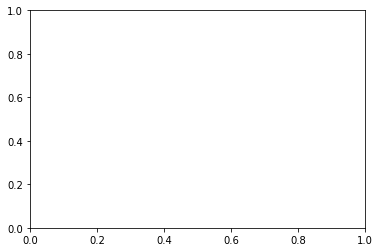

In [153]:
# Range Scan
spectrum_rx = ascan_rx[:,i,4,i]
#print(Range_list[4], sourceDepth_list[5])

pl.plot(tx_pulse.freq_space, spectrum_rx)  # transmitted Pulse in frequency space
pl.show()

pulse_rx = np.fft.ifft(spectrum_rx)
pl.plot(tx_pulse.time_space, tx_pulse.real)  # transmitted Pulse in time space


pl.show()

range_scan = np.zeros((nRanges, tx_pulse.nSamples))
for i in range(nRanges):
    spectrum_rx = ascan_rx[:,0,i,0]
    nHalf = int(len(spectrum_rx)/2)
    spectrum_rx[:nHalf] = np.zeros(nHalf)
    
    pulse_rx = np.fft.ifft(spectrum_rx)
    pulse_rx = butterBandpassFilter(pulse_rx, 0.25e9, 0.75e9, 1/sampling_interval,4)
    pl.plot(tx_pulse.time_space*1e9, abs(pulse_rx)) # transmitted and received pulses
    pl.title('Range between TX and RX = '+ (str(round(Range_list[i],2)))+ ' m')
    pl.xlabel('Time [ns]')
    pl.ylabel('Magnitude')
    pl.show()
    #pl.xlim(800e-9, 1000e-9)

    range_scan[i,:] = abs(pulse_rx)


NameError: name 'range_scan' is not defined

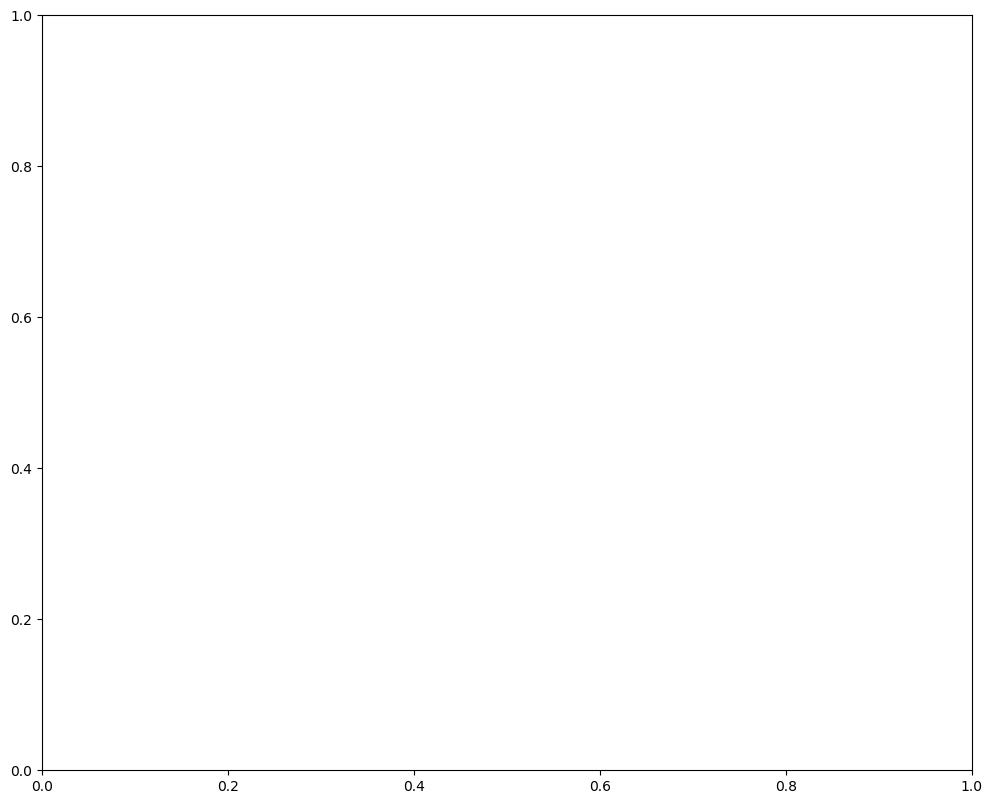

In [66]:
fig=pl.figure(figsize=(12,10), dpi =100)
ax = fig.add_subplot(111)
pl.imshow(range_scan, extent=(0,max(tx_pulse.time_space)*1e9, max(Range_list), 0),aspect='auto')
pl.colorbar()
pl.show()

In [160]:
depth_scan = np.zeros((nDepths_rx, tx_pulse.nSamples))

fitfunc = lambda p, x: gaussian(x, p[0], p[1], p[2], p[3])  # fit function for SciPy optimize
errfunc = lambda p, x, y: fitfunc(p, x) - y  # residual function -> minimized by SciPy optimize

fitfunc2 = lambda q, x: gauss_pulse(x, q[0], 500e6, q[1]).real
errfunc2 = lambda q, x, y: fitfunc2(q, x) - y

In [161]:
def gauss_pulse(t, t_central, frequency, amplitude):
    return amplitude * scipy.signal.gausspulse(t-t_central, frequency)

In [162]:
def gaussian(x, mu, sig, norm, base):
    a = -1. * pow(x - mu, 2. ) / (2 * pow(sig, 2.))
    return norm * np.exp(a) + base

Text(0.5, 1.0, 'Real and Imaginary Part and Envelope \n of a Gaussian Pulse with $f_c$ = 500 MHz')

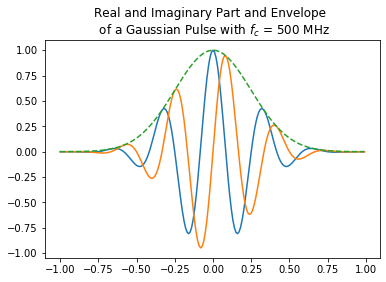

In [163]:
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 2 * 100, endpoint=False)
i, q, e = signal.gausspulse(t, fc=3, retquad=True, retenv=True)
plt.plot(t, i, t, q, t, e, '--')
plt.title('Real and Imaginary Part and Envelope \n of a Gaussian Pulse with $f_c$ = 500 MHz')

In [164]:
print(Range_list)
print(sourceDepth_list)

[ 10.  20.  30.  50.  80. 100.]
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40. 42. 44. 46. 48. 50.]


C:\Users\gianl\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in sqrt


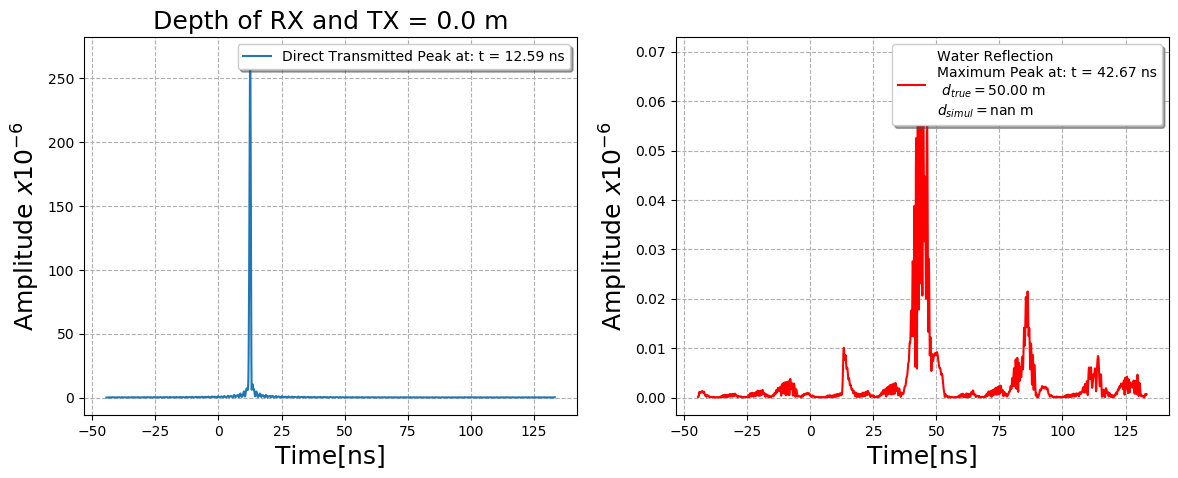

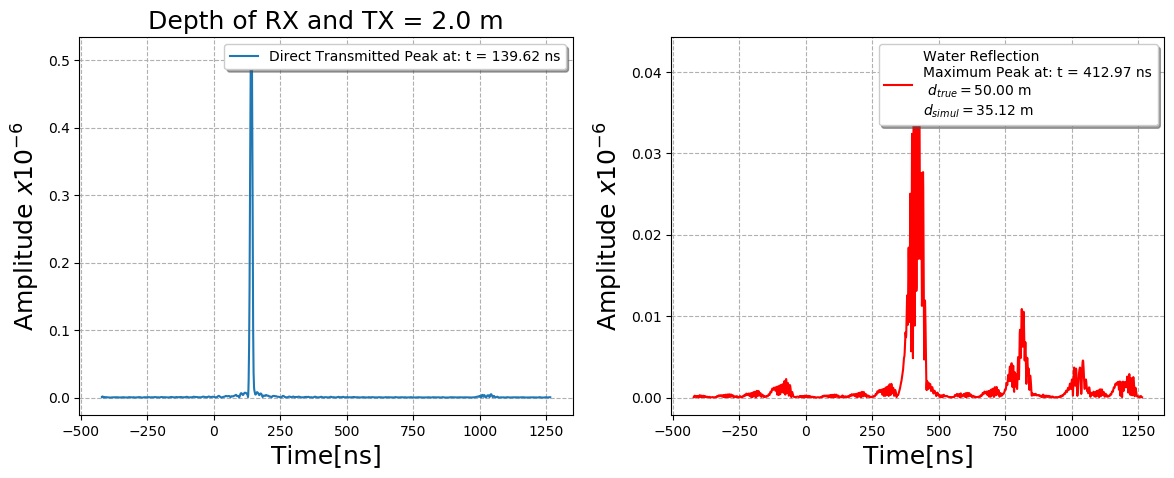

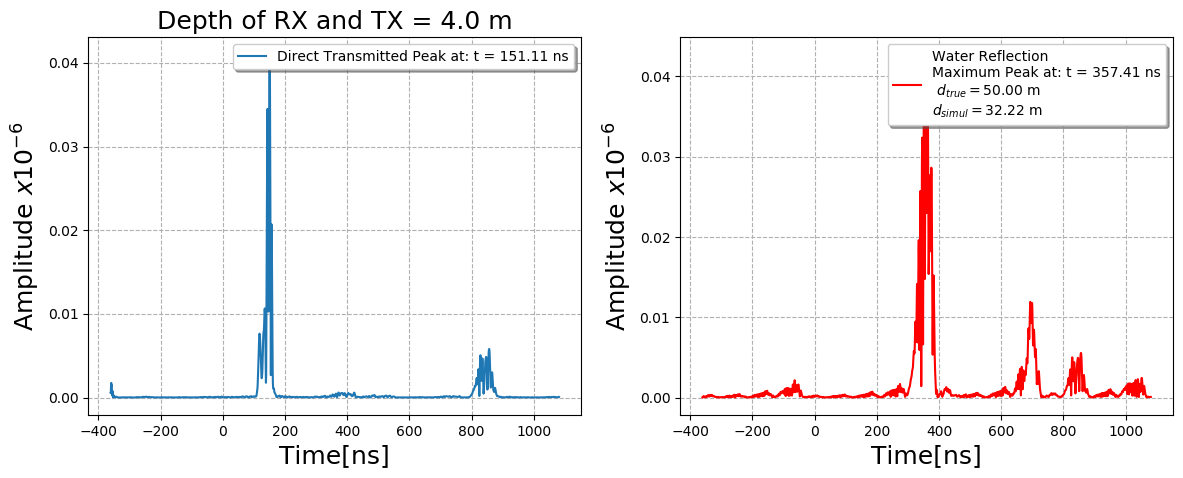

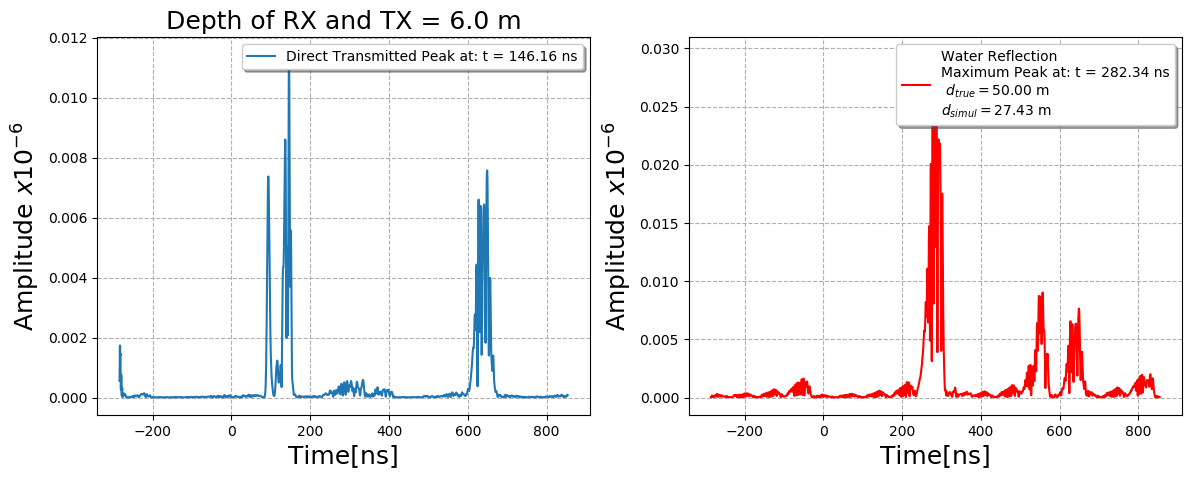

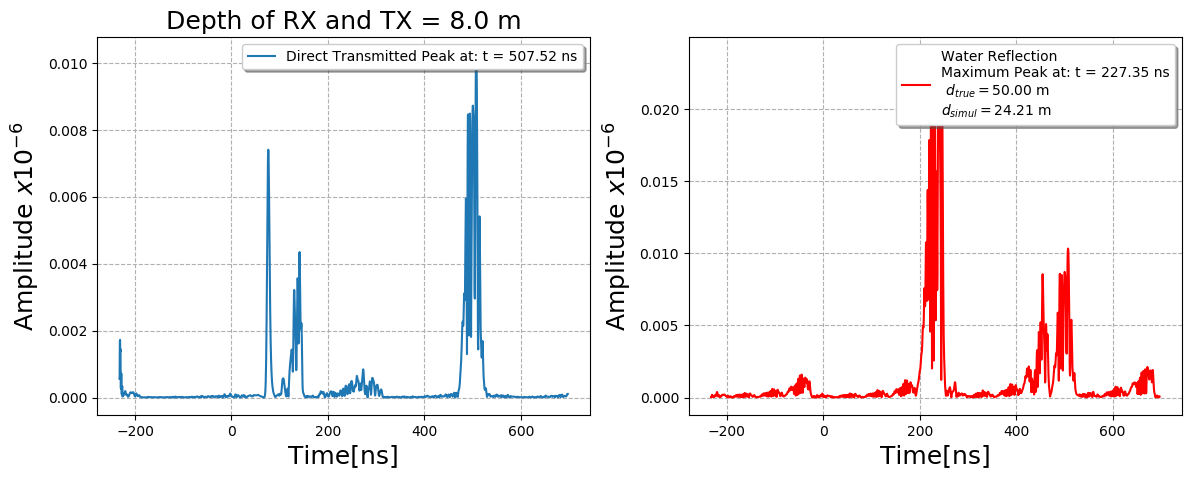

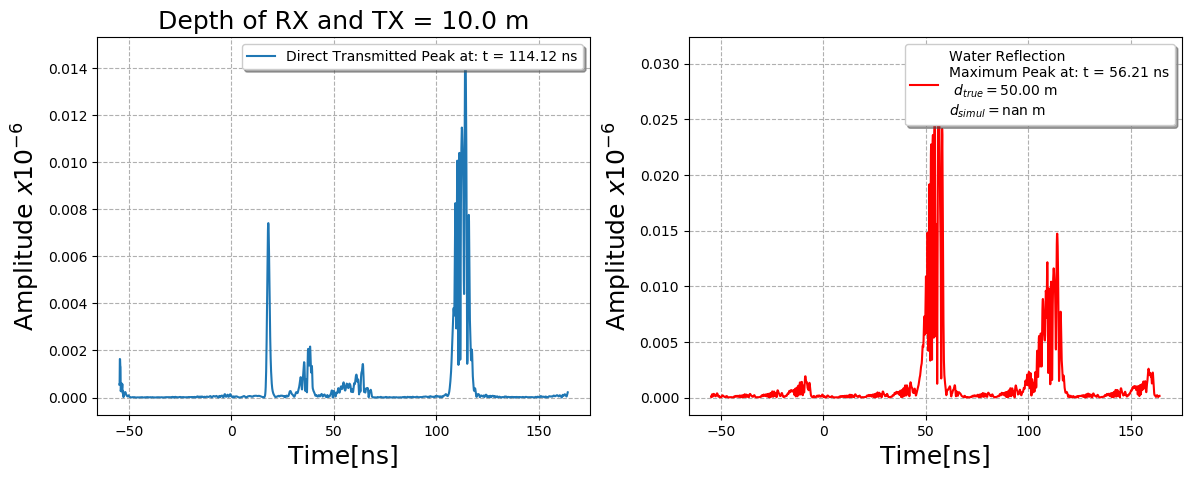

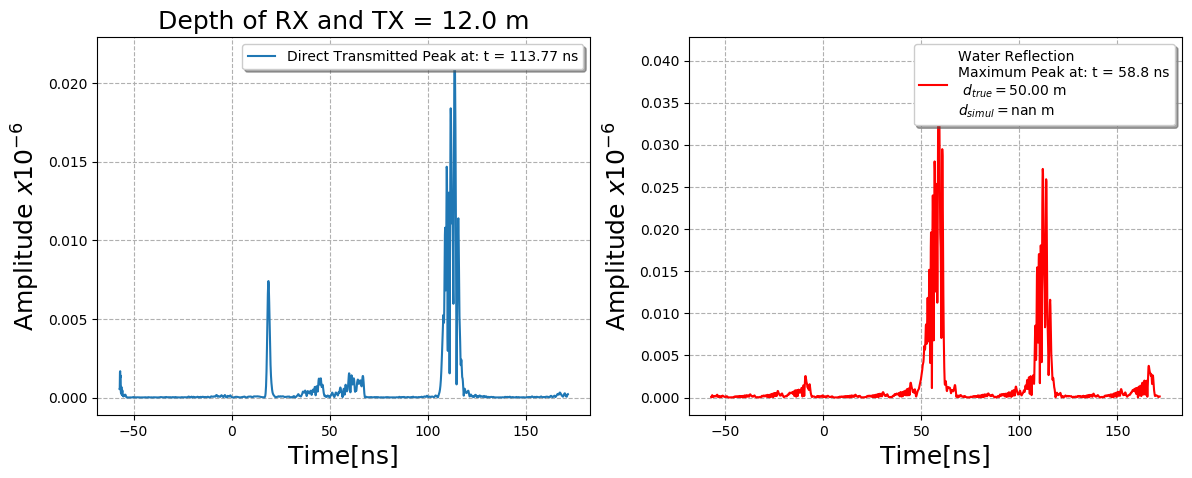

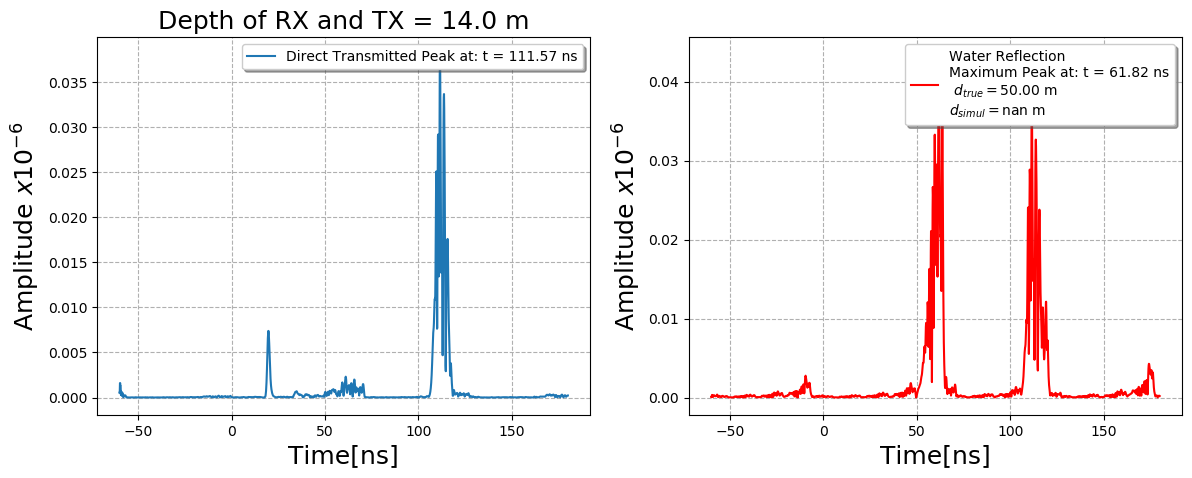

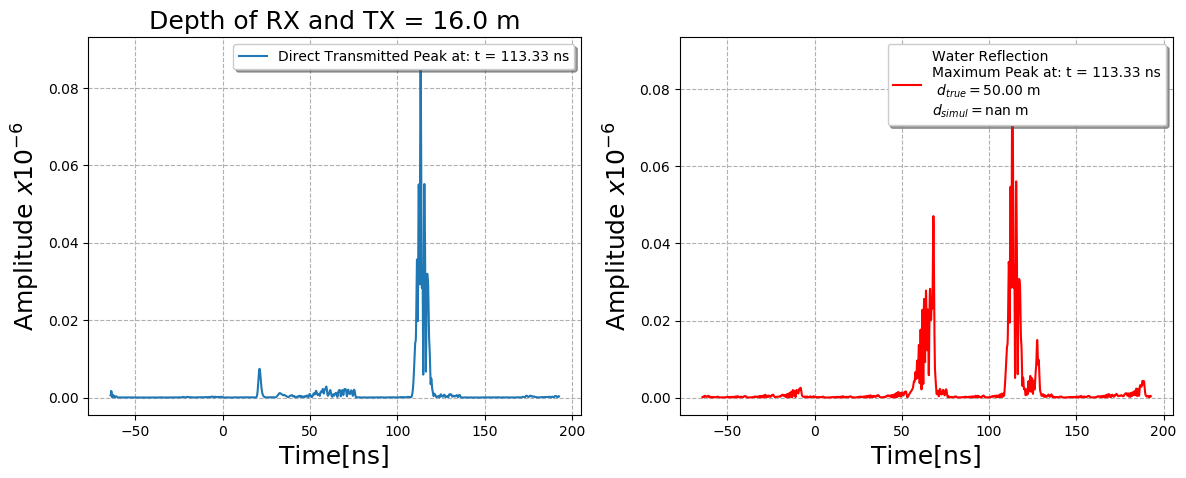

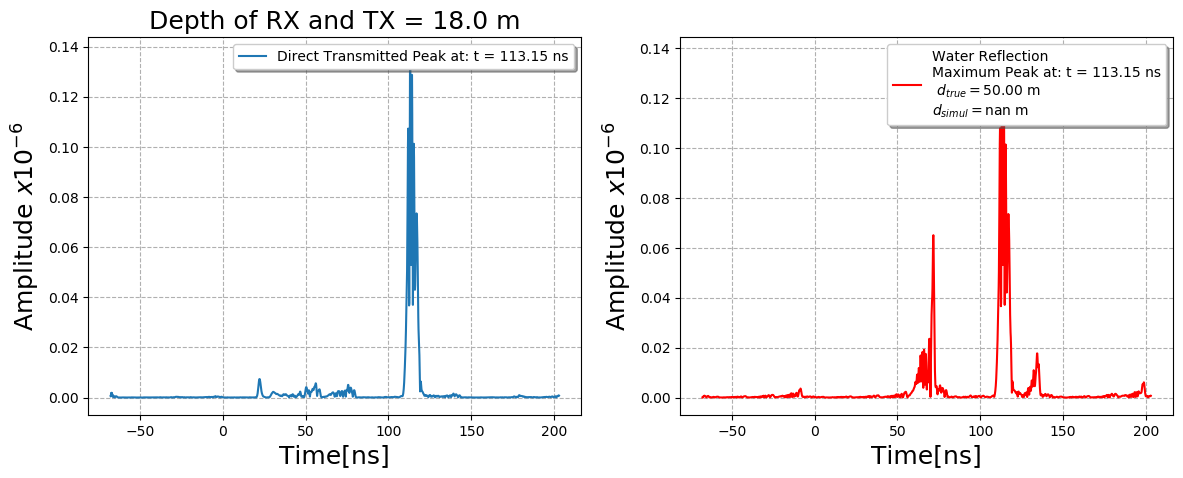

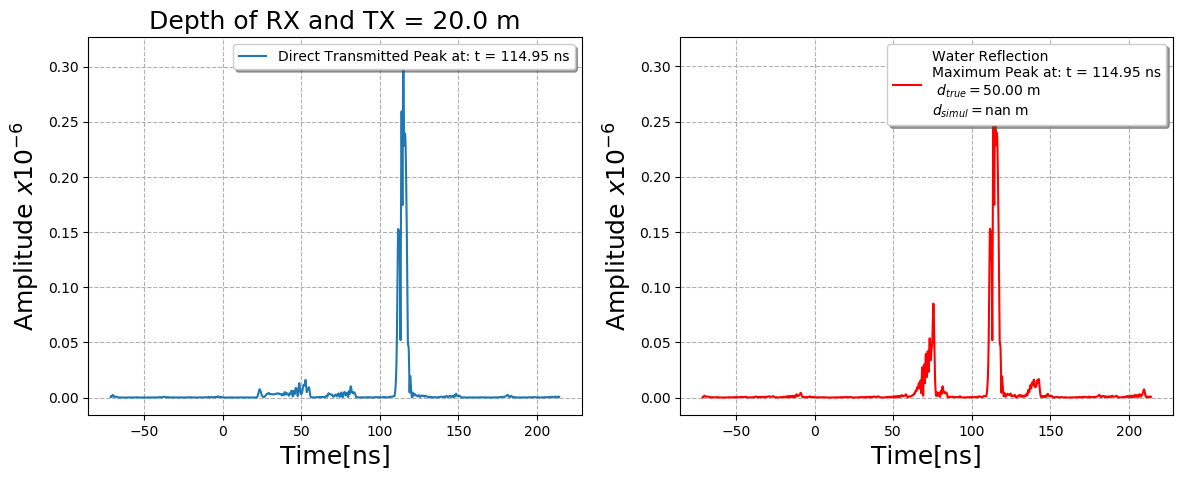

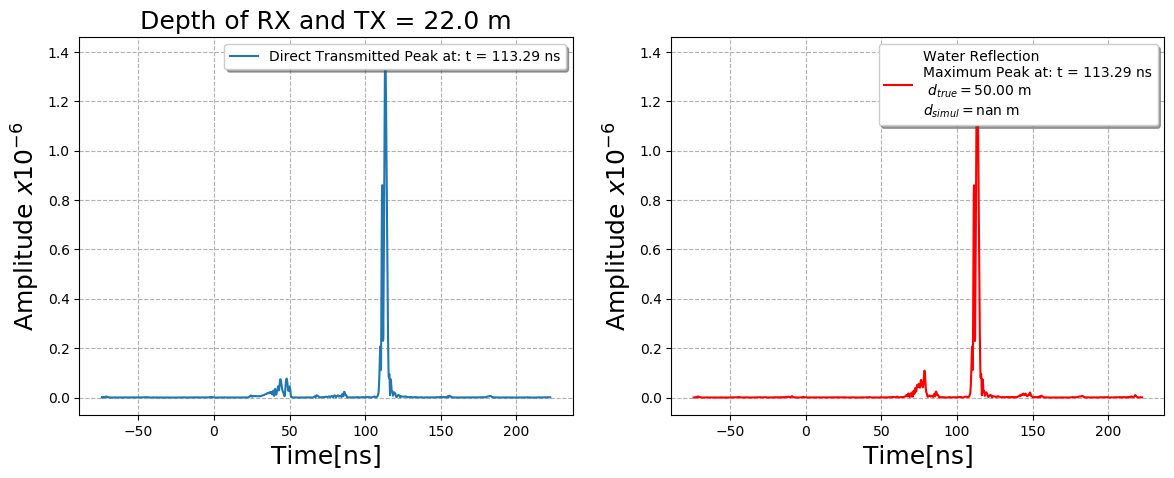

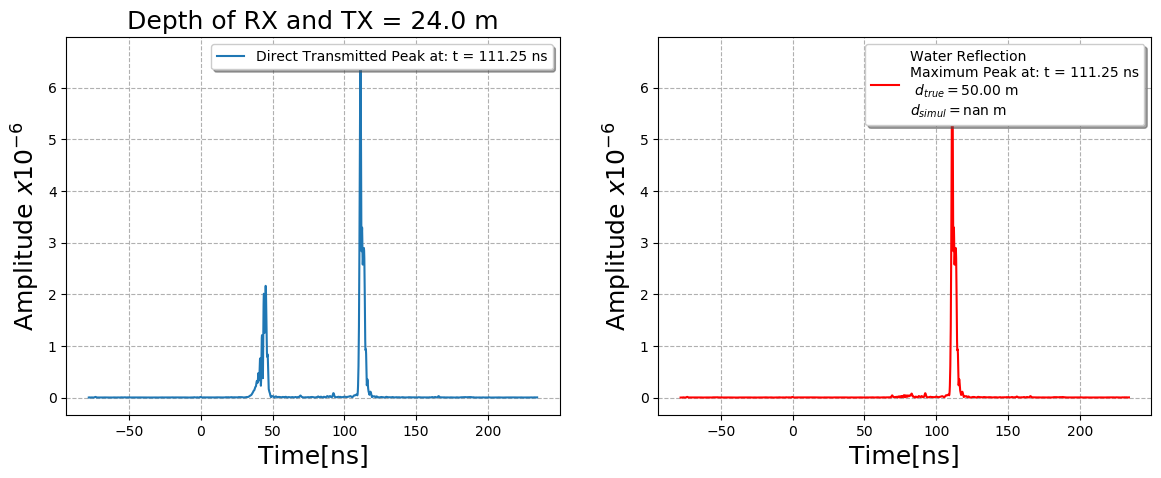

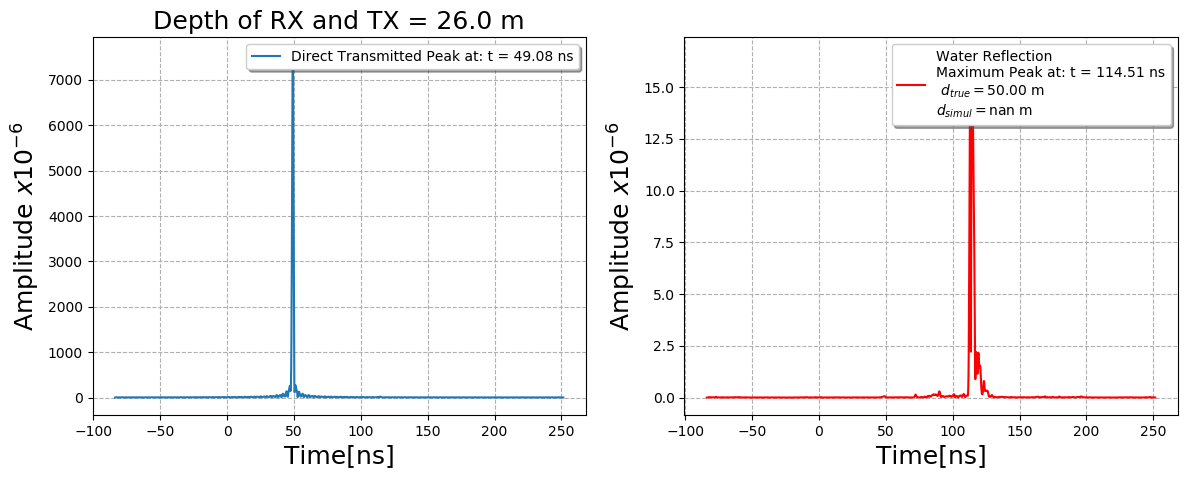

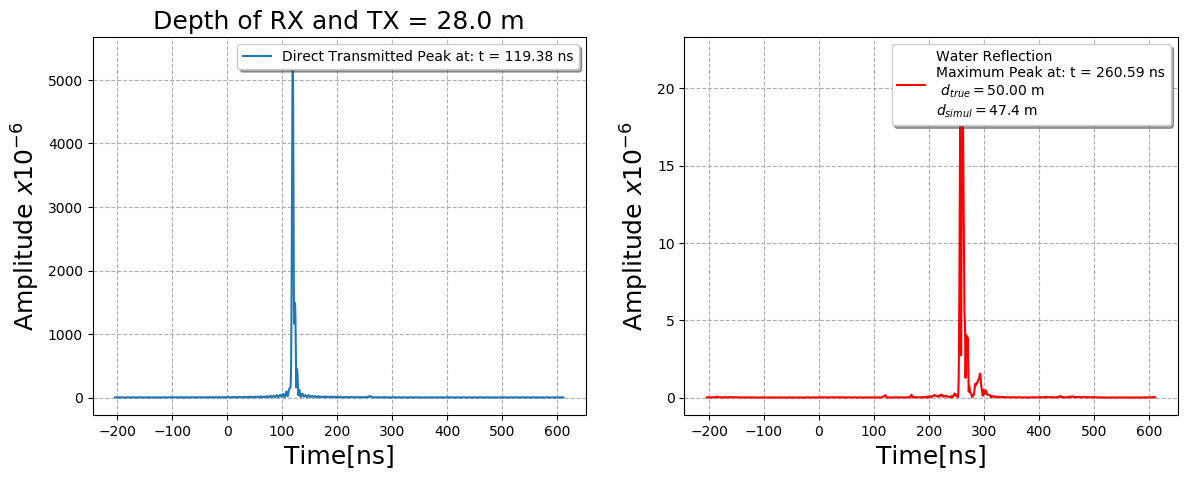

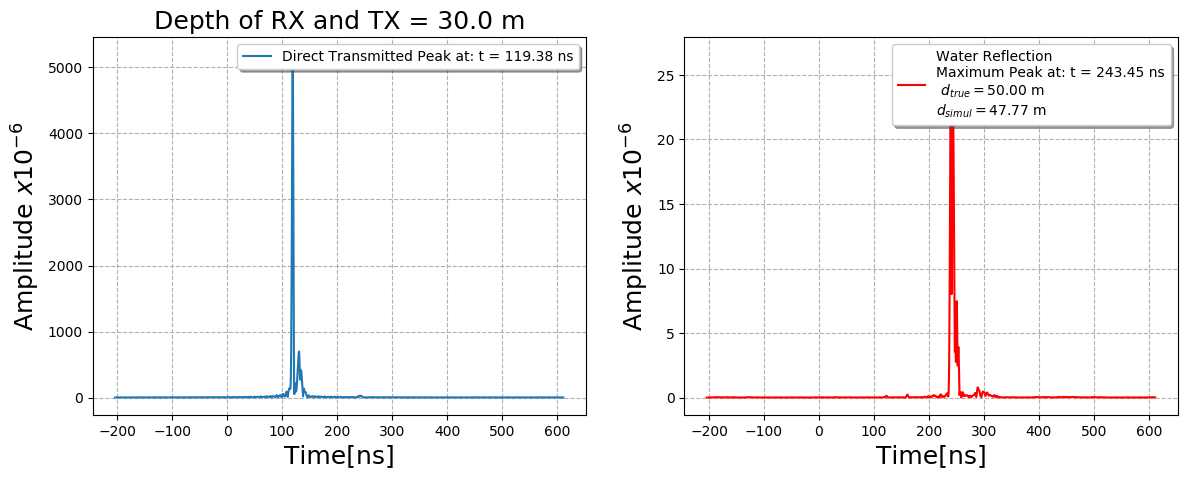

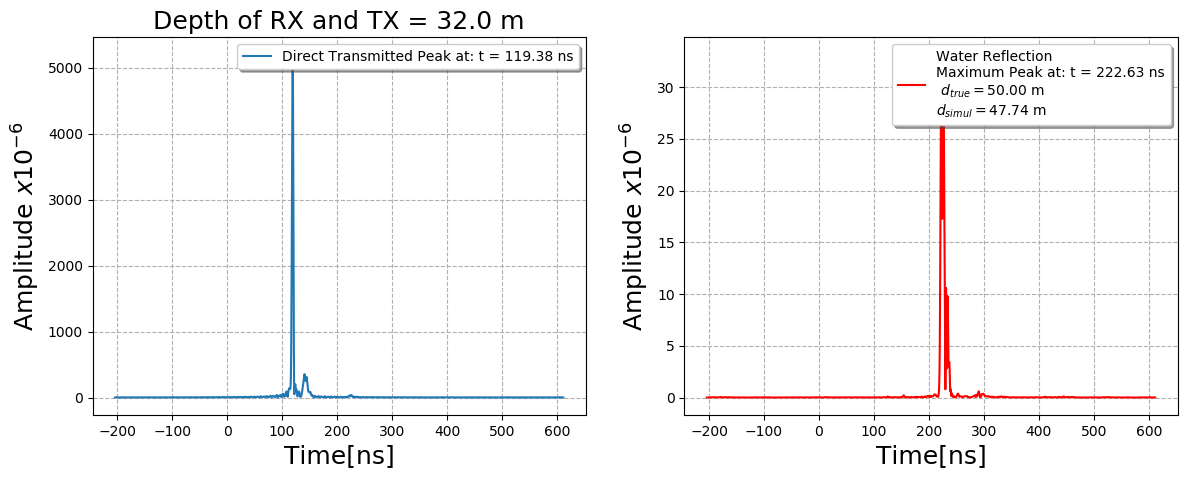

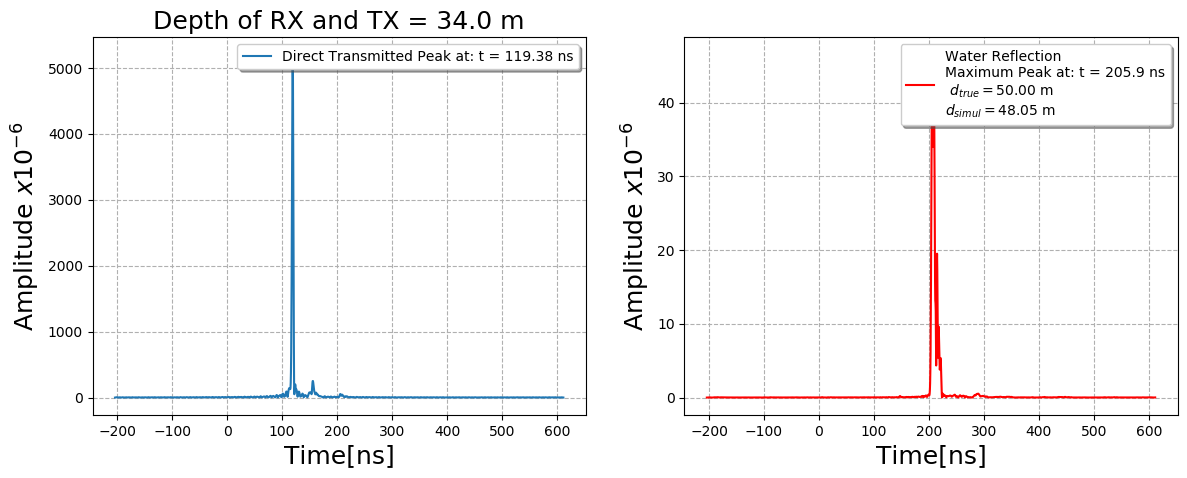

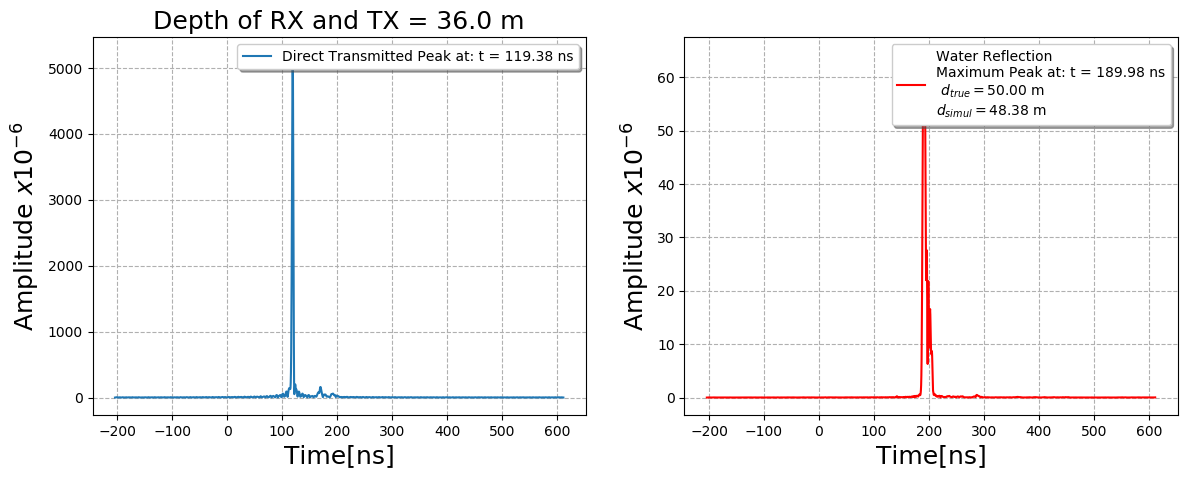

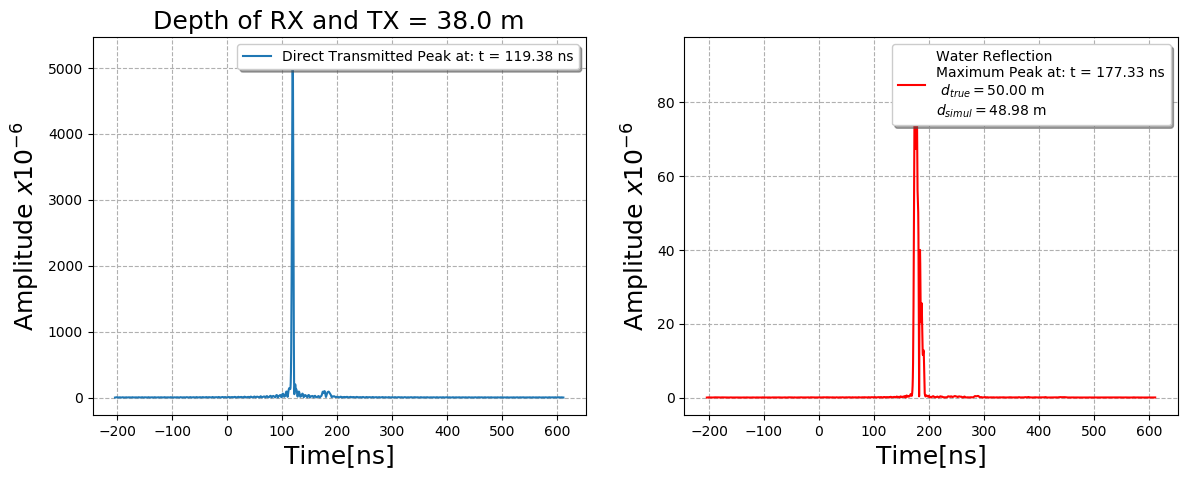

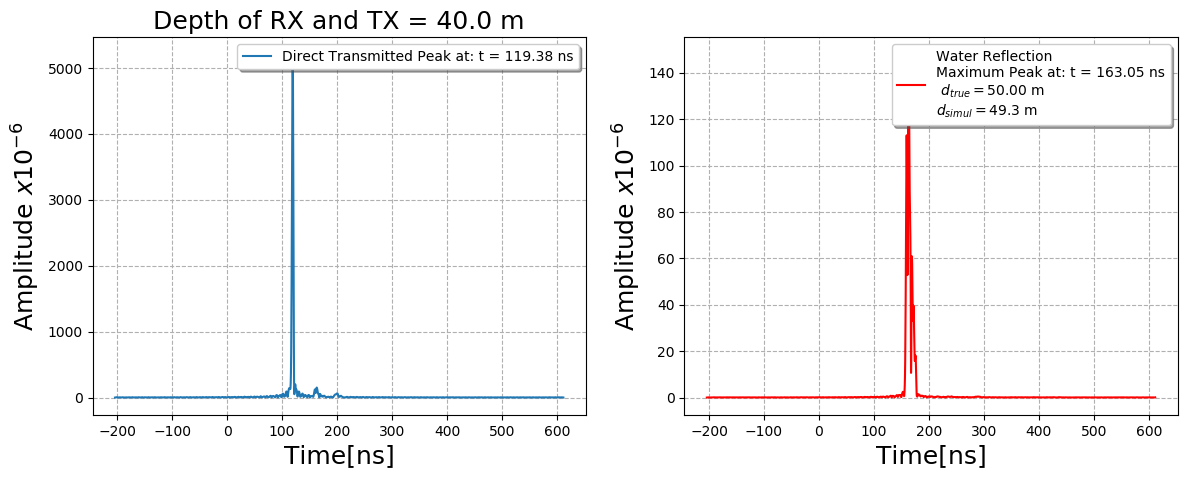

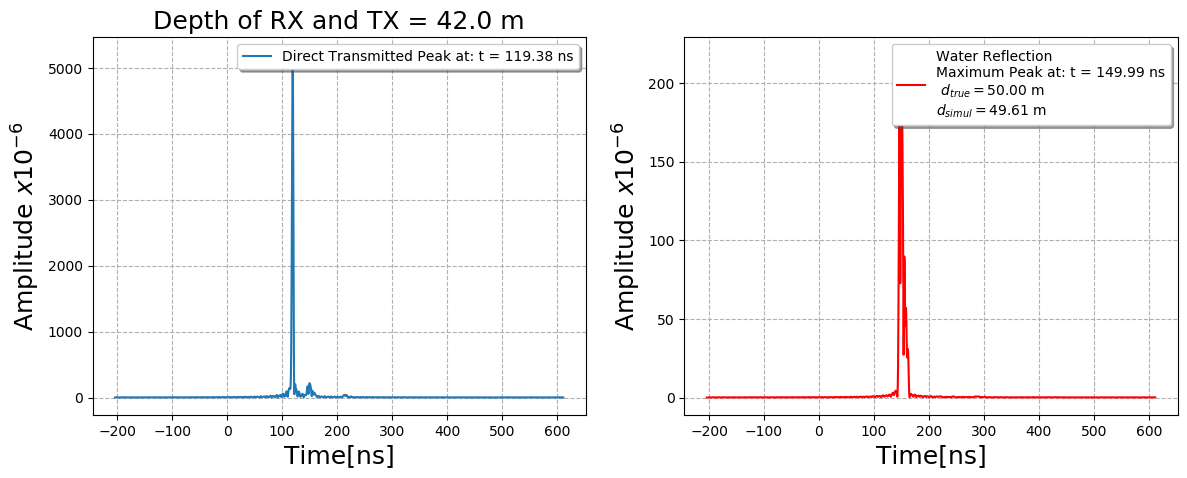

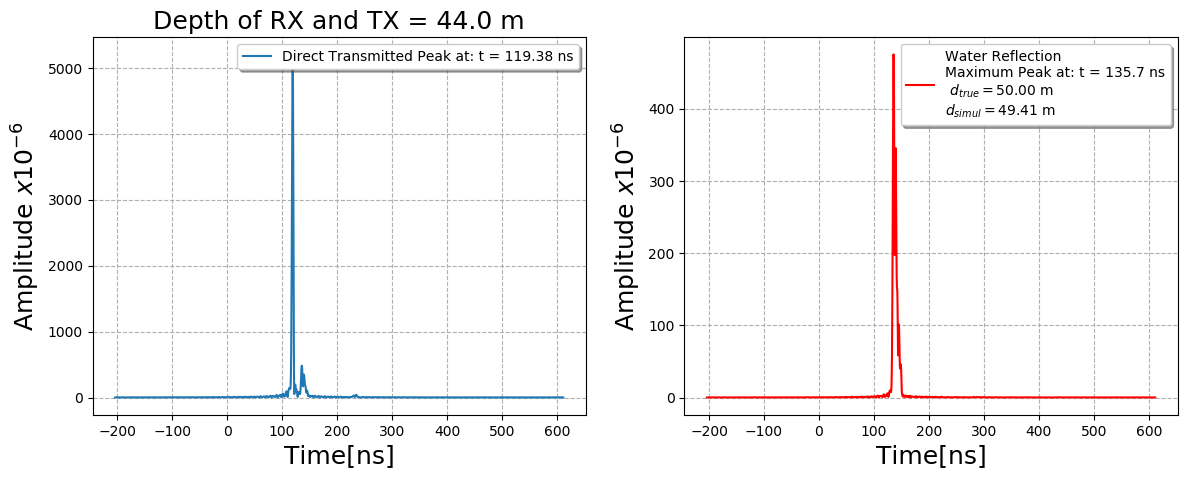

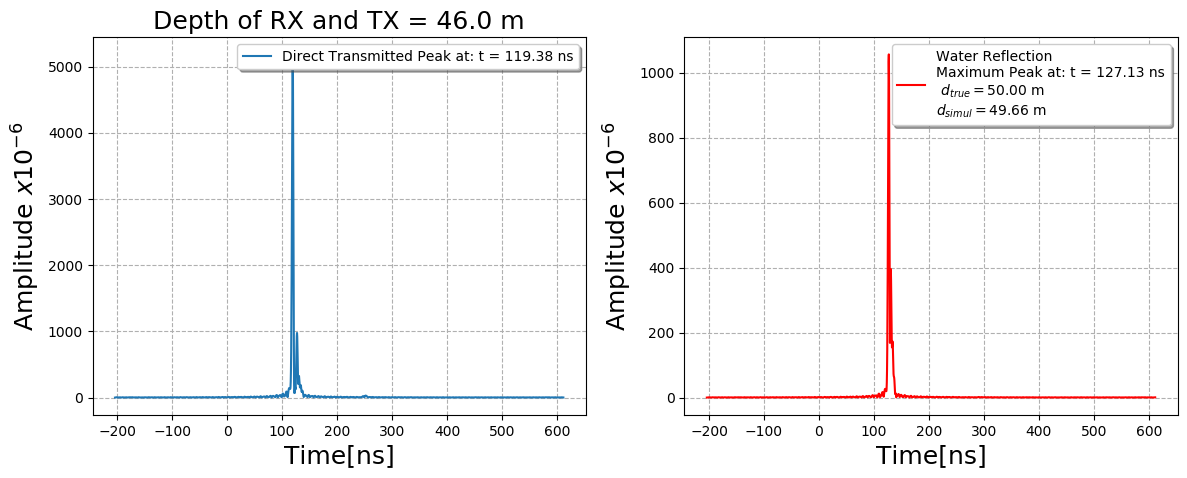

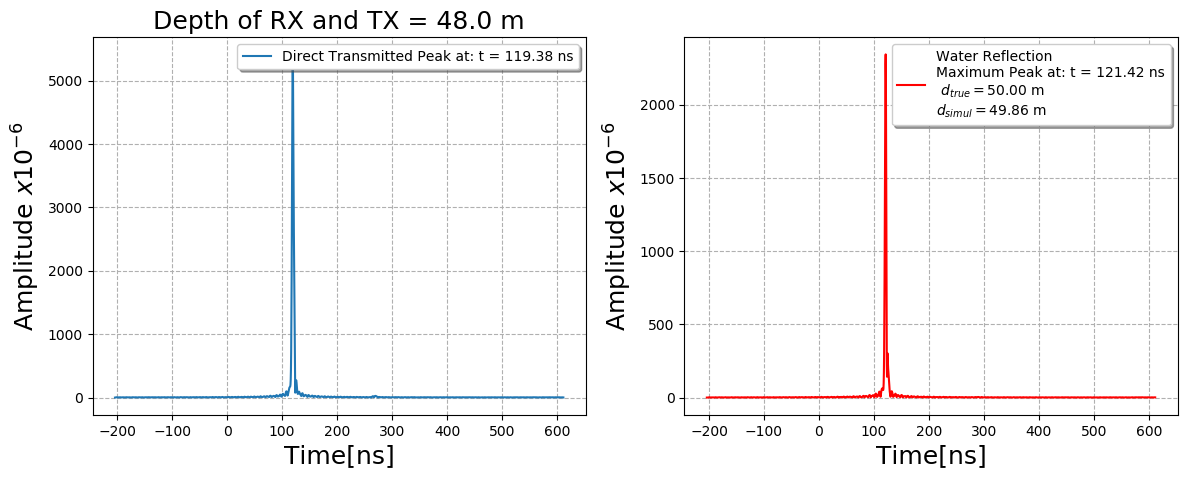

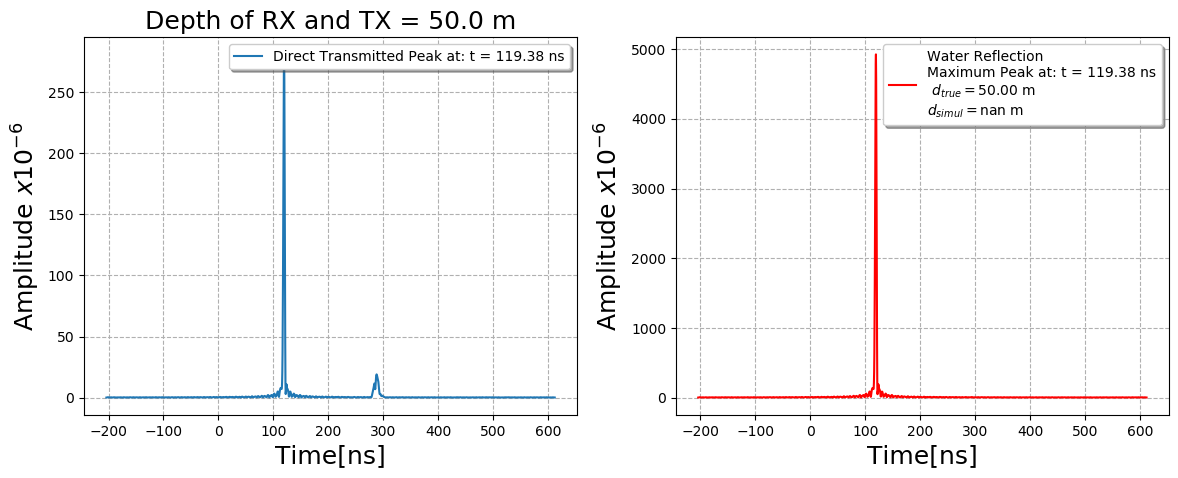

In [165]:
c = 2.997e8
for i in range(nDepths_rx):
    spectrum_rx = ascan_rx[:,i,1,i] 
    spectrum_rx_ref = ascan_rx_ref[:,i,1,i] #ranges
    nHalf = int(len(spectrum_rx)/2)
    spectrum_rx[:nHalf] = np.zeros(nHalf)
    pulse_rx = np.fft.ifft(spectrum_rx)    # Fourier Transformation of the receiving Spectrum
    pulse_rx = butterBandpassFilter(pulse_rx, 0.25e9, 0.75e9, 1/sampling_interval, 4) # Highpass Filter
    nHalf_ref = int(len(spectrum_rx_ref)/2)
    spectrum_rx_ref[:nHalf_ref] = np.zeros(nHalf_ref)
    pulse_rx_ref = np.fft.ifft(spectrum_rx_ref)
    pulse_rx_ref = butterBandpassFilter(pulse_rx_ref, 0.25e9, 0.75e9, 1/sampling_interval, 4)
    
    
    
    # F I L T E R I N G
    spectrum = spectrum_rx - spectrum_rx_ref  #depths
    nHalf_filt = int(len(spectrum)/2)
    spectrum[:nHalf_filt] = np.zeros(nHalf_filt)
    pulse = np.fft.ifft(spectrum)
    pulse = butterBandpassFilter(pulse, 0.25e9, 0.75e9, 1/sampling_interval, 4)
    #pulse = pulse_rx - pulse_rx_ref
        
    
    
    # P E A K  A N A L Y S I S
    
    r = 20
    time = np.linspace(min(tx_pulse.time_space), max(tx_pulse.time_space), len(abs(pulse_rx))) 
    time = time-200e-9
    epsilon_r_ice = 3.2
    t_true = r/(c/np.sqrt(epsilon_r_ice))
    time = time/(time[indexes][0]*1e9)*t_true*1e9
    indexes_water = pku.indexes(abs(pulse), thres = 0.95)
    
    indexes = pku.indexes(abs(pulse_rx), thres = 0.9)

    
    # F I T T I N G 
        
    #p0 = [fpeaks[0], fmod, max(abs(pulse_rx)), np.median(abs(pulse_rx))]   # Fit Parameters 
    #p1 = least_squares(errfunc, p0[:], args = (time, abs(pulse_rx)))   # Fit Method
    #q0 = [fpeaks_water[0], max(abs(pulse))]
    #q1 = least_squares(errfunc2, q0[:], args = (time, abs(pulse)))
    
    
    # D E P T H

    def WaterPocketDepth(t,r):
        epsilon_r = 3.2
        d = 0.5*np.sqrt((c**2/epsilon_r)*t**2-r**2) + receiverDepth_list[i]
        return d
   


    # P L O T T I N G
    
    d_simul = WaterPocketDepth(time[indexes_water][0],20)
    fig = pl.figure(figsize=(14,11), dpi = 100)
    #peak_label = 'Maximum Peak at: t = '+ str(round(time[indexes_water][0]*1e9,2)) + ' ns'
    peak_label2 = 'Direct Pulse \n $t_{direct}$ = '+ str(round(time[indexes][0],2)) + ' ns'
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    #ax3 = fig.add_subplot(223)
    
    #gauss_label = 'Gaussian Fit: \n $\Delta t = ' + str(round(p1.x[0]*1e9,2)) + '\pm' + str(round(p1.x[1]*1e9,2)) +  '$ ns \n a = '+ str(round(p1.x[2],4))
    peak_label = 'Maximum Peak at: t = '+ str(round(time[indexes_water][0]*1e9,2)) + ' ns'
    peak_label2 = 'Direct Transmitted Peak at: t = '+ str(round(time[indexes][0]*1e9,2)) + ' ns'
    ax2label = 'Maximum Peak at: t = '+ str(round(time[indexes_water][0]*1e9,2)) + ' ns'  + '\n $d_{true} = 50.00$ m\n$ d_{simul} = $' + str(round(d_simul,2)) + ' m' 
    #ax2label = 'Maximum Peak at: t = '+ str(round(time[indexes_water][0]*1e9,2)) + ' ns'
    
    ax1.plot(time*1e9, 1e6*abs(pulse_rx), label = peak_label2)
    ax2.plot(time*1e9, 1e6*abs(pulse), c='r', label='Water Reflection\n'+ax2label)
    #ax1.set_xlim(time[indexes][0]-30e-9,time[indexes][0]+30e-9)
    
    #ax4.plot(WaterPocketDepth(time, 100), 1e6*abs(pulse), label=ax4label)
    #pplot(time*1e9, 1e6*abs(pulse), indexes_water)
    #print(time[indexes_water][0])

    
    
    ax1.legend(loc='upper right', shadow = True, fontsize=10)
    ax2.legend(loc='upper right', shadow = True, fontsize=10)
    ax3.legend(loc='upper right', shadow= True, fontsize=10)

    ax1.set_xlabel('Time[ns]', fontsize=18)
    ax1.set_ylabel('Amplitude $x 10^{-6}$', fontsize=18)
    ax2.set_xlabel('Time[ns]', fontsize=18)
    ax2.set_ylabel('Amplitude $x 10^{-6}$', fontsize=18)
    
    ax1.grid(linestyle='--')
    ax2.grid(linestyle='--')


    ax1.set_title('Depth of RX and TX = '+ str(receiverDepth_list[i])+ ' m', fontsize=18)
  
    pl.show()  



C:\Users\gianl\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in sqrt


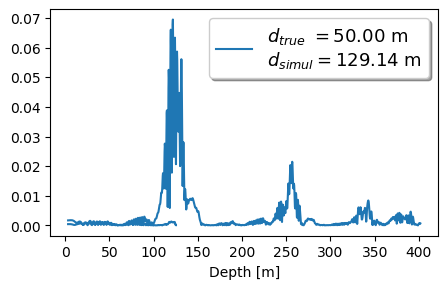

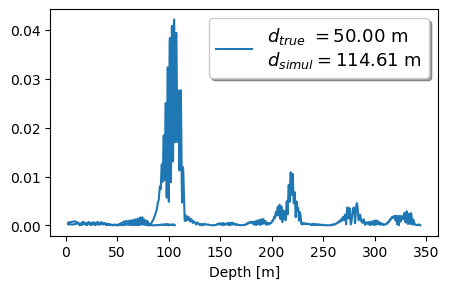

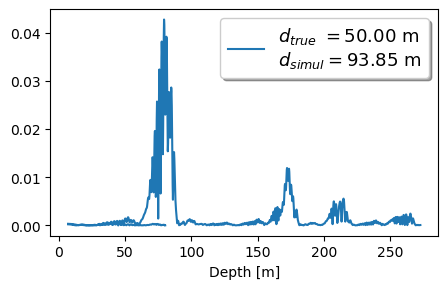

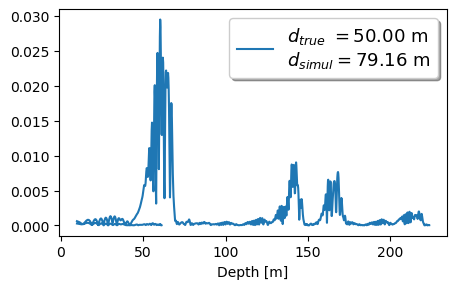

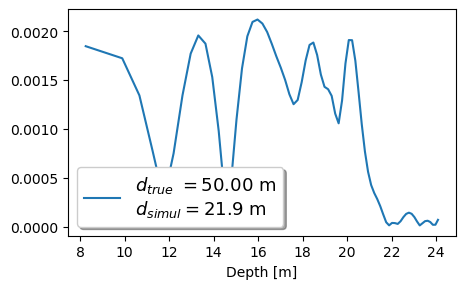

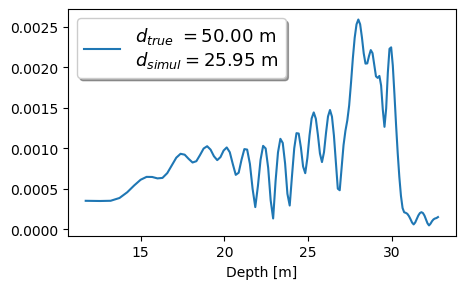

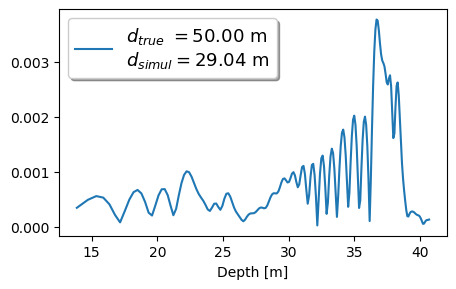

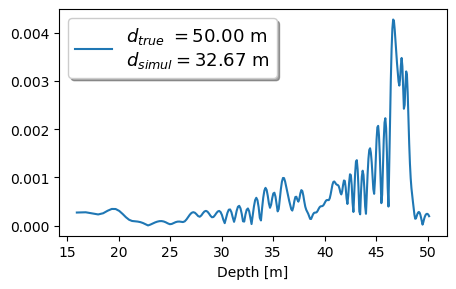

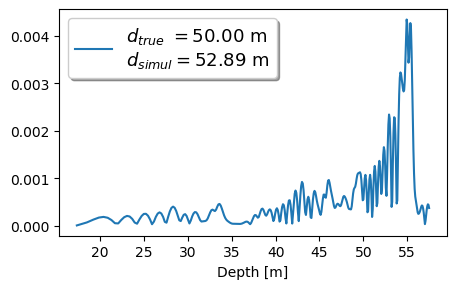

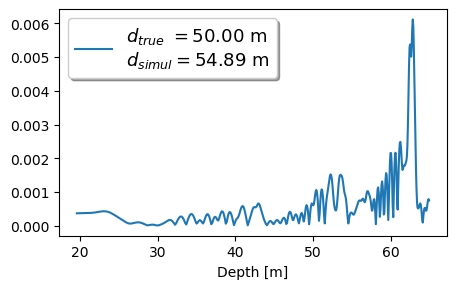

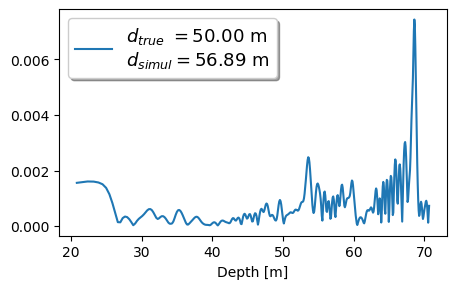

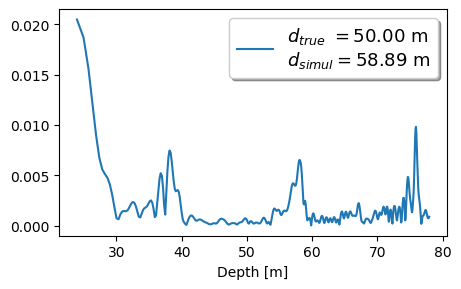

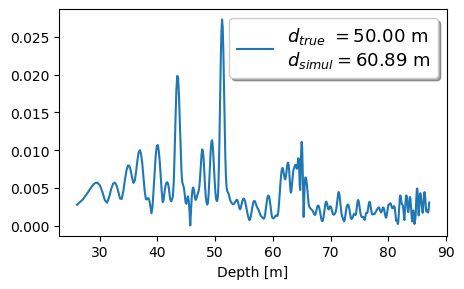

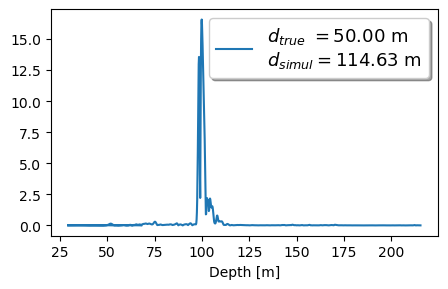

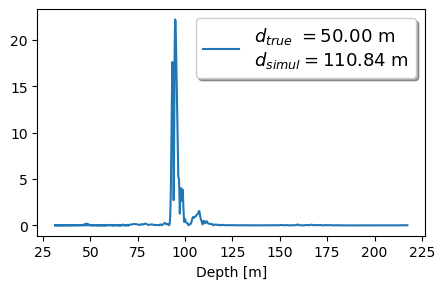

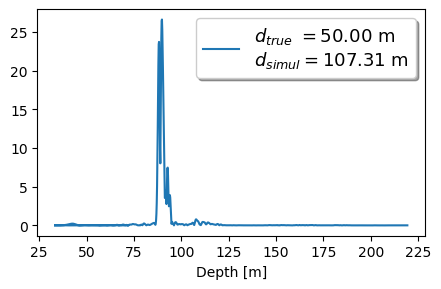

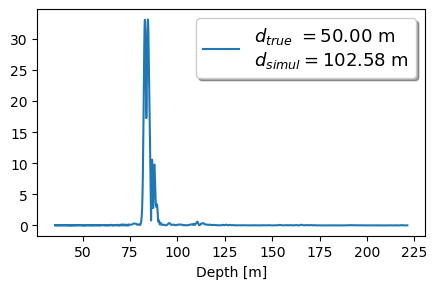

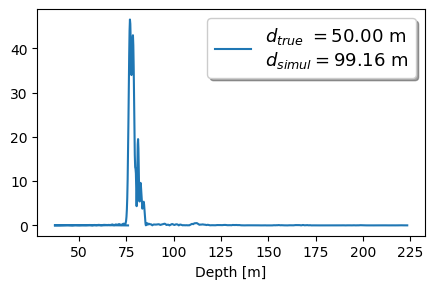

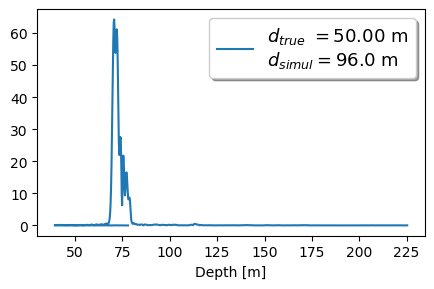

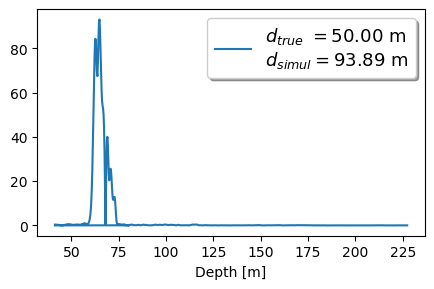

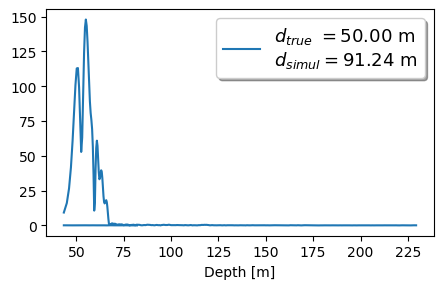

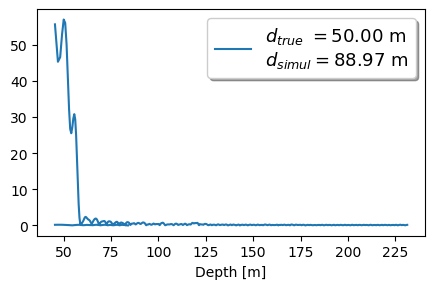

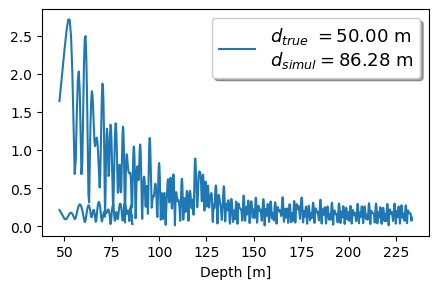

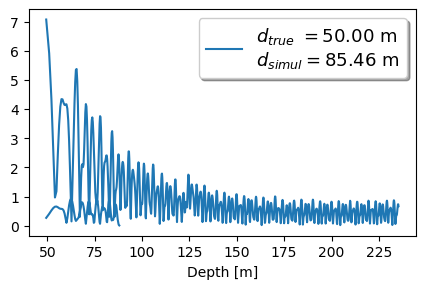

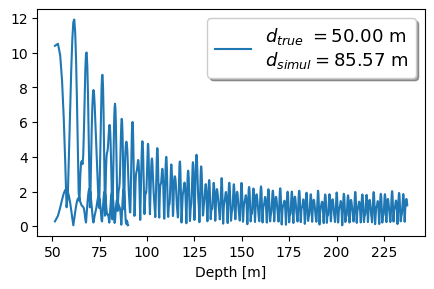

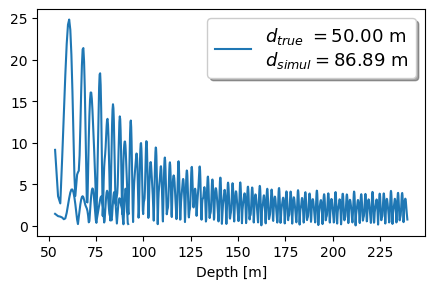

In [87]:
c = 2.997e8
for i in range(nDepths_rx):
    spectrum_rx = ascan_rx[:,i,1,i] 
    spectrum_rx_ref = ascan_rx_ref[:,i,1,i] #ranges
    nHalf = int(len(spectrum_rx)/2)
    spectrum_rx[:nHalf] = np.zeros(nHalf)
    pulse_rx = np.fft.ifft(spectrum_rx)    # Fourier Transformation of the receiving Spectrum
    pulse_rx = butterBandpassFilter(pulse_rx, 0.25e9, 0.75e9, 1/sampling_interval, 4) # Highpass Filter
    nHalf_ref = int(len(spectrum_rx_ref)/2)
    spectrum_rx_ref[:nHalf_ref] = np.zeros(nHalf_ref)
    pulse_rx_ref = np.fft.ifft(spectrum_rx_ref)
    pulse_rx_ref = butterBandpassFilter(pulse_rx_ref, 0.25e9, 0.75e9, 1/sampling_interval, 4)
    
    
    
    # F I L T E R I N G
    spectrum = spectrum_rx - spectrum_rx_ref  #depths
    nHalf_filt = int(len(spectrum)/2)
    spectrum[:nHalf_filt] = np.zeros(nHalf_filt)
    pulse = np.fft.ifft(spectrum)
    pulse = butterBandpassFilter(pulse, 0.25e9, 0.75e9, 1/sampling_interval, 4)
    #pulse = pulse_rx - pulse_rx_ref
    
      
    # P E A K  A N A L Y S I S
    
    indexes = pku.indexes(abs(pulse_rx), thres = 0.9)
    time = np.linspace(min(tx_pulse.time_space), max(tx_pulse.time_space), len(abs(pulse_rx))) 
    #time = (time-200e-9)/351.75*298.142
    epsilon_r_ice = 3.2
    #epsilon_r_snow = 1.2
    
    r = 100
    t_true = r/(c/np.sqrt(epsilon_r_ice))
    time = time-200e-9
    time = time/(time[indexes][0])*t_true
    indexes_water = pku.indexes(abs(pulse), thres = 0.95)
    
    
    
    # D E P T H

    def WaterPocketDepth(t,r):
        epsilon_r = 2.34**2
        d = 0.5*np.sqrt(c**2/epsilon_r*t**2-r**2) + receiverDepth_list[i]
        return d
   


    # P L O T T I N G
    
    #d_simul =  []
    d_simul = WaterPocketDepth(time[indexes_water][0],20)
    fig = pl.figure(figsize=(5,3), dpi = 100)


    ax4label = '$d_{true} \,\,= 50.00$ m\n$d_{simul} = $' + str(round(d_simul,2)) + ' m'


    pl.plot(WaterPocketDepth(time, 100), 1e6*abs(pulse), label=ax4label)
    pl.xlabel('Depth [m]')
    pl.ylabel('')
    

    pl.legend(loc='best', shadow = True, fontsize = 13)


    pl.show() 

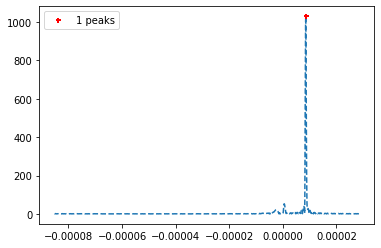

8.555304018017246e-06


In [24]:
pplot(time, 1e6*abs(pulse), indexes_water)
pl.show()
print(time[indexes_water][0])

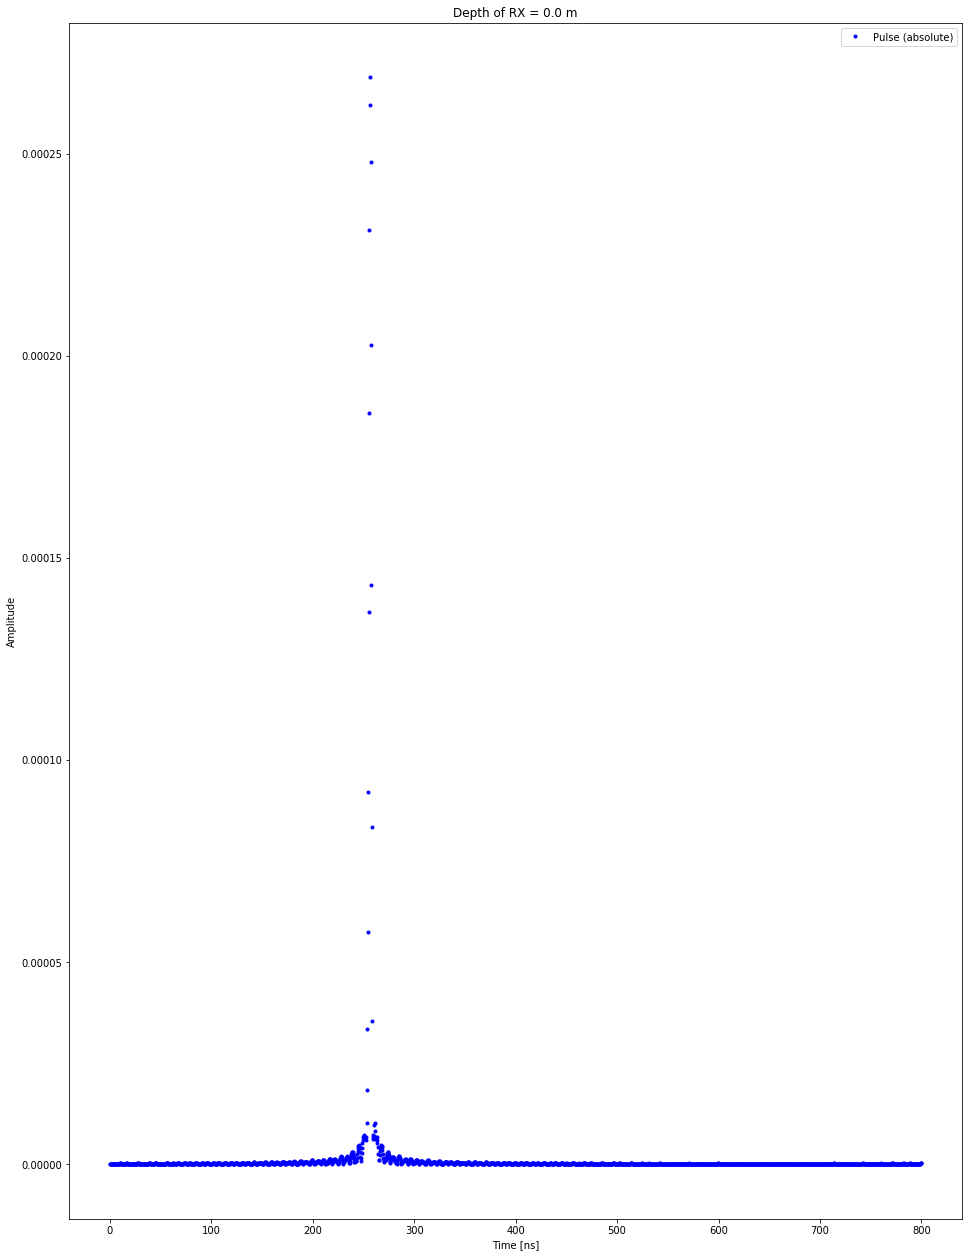

ValueError: could not broadcast input array from shape (1999,) into shape (799,)

In [43]:
# Depth Scan
depth_scan = np.zeros((nDepths_rx, tx_pulse.nSamples))

for i in range(nDepths_rx):
    spectrum_rx = ascan_rx[:,i,1,i] # []
    nHalf = int(len(spectrum_rx)/2)
    spectrum_rx[:nHalf] = np.zeros(nHalf)
    pulse_rx = np.fft.ifft(spectrum_rx)    # Fourier Transformation of the receiving Spectrum
    pulse_rx = butterBandpassFilter(pulse_rx, 0.25e9, 0.75e9, 1/sampling_interval, 4) # Highpass Filter
    
    indexes = pku.indexes(pulse_rx.real, thres = 0.5)
    time = np.linspace(min(tx_pulse.time_space), max(tx_pulse.time_space), len(abs(pulse_rx))) 
    fpeaks = pku.interpolate(time, abs(pulse_rx), indexes)
    #fmod = 1/500e6
    
    
    # F I T T I N G 
        
    #p0 = [fpeaks[0], fmod, max(abs(pulse_rx)), np.median(abs(pulse_rx))]   # Fit Parameters 
    #p1 = least_squares(errfunc, p0[:], args = (time, abs(pulse_rx)))   # Fit Method
    #q0 = [fpeaks[0], max(pulse_rx.real)]
    #q1 = least_squares(errfunc2, q0[:], args = (time, pulse_rx.real))
    
    
    
    # F I L T E R I N G
    
    #pulse_filtered = abs(pulse_rx) - np.array(gaussian(time, p1.x[0], p1.x[1], p1.x[2], p1.x[3])) # pulse without direct transmitted signal
    #pulse_filtered = abs(pulse_rx) - abs(gauss_pulse(p1.x[0], 500e-9, 500e6, p1.x[2]))
    #pulse_filtered = pulse_rx - gauss_pulse(time, q1.x[0], 500e6,  q1.x[1]).real 
    
    
    
    # P L O T T I N G
    
    #plt.rcParams["figure.figsize"] = (20, 9)
    #fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    
    #gauss_label = 'Gaussian Fit: \n $\Delta t = ' + str(round(p1.x[0]*1e9,2)) + '\pm' + str(round(p1.x[1]*1e9,2)) +  '$ ns \n a = '+ str(round(p1.x[2],4)) 
    #pl.plot(time, abs(pulse_rx)-gaussian(time, p1.x[0], p1.x[1], p1.x[2], p1.x[3])) # subtraction pulse - direct signal
    #pl.plot(time*1e9, abs(pulse_rx), label = 'Absolute Pulse')   # Absolute Pulse
    
    pl.plot(time*1e9, abs(pulse_rx), label =  'Pulse (absolute)', c = 'b', linestyle='None', marker='.')  # Complex Pulse
    
    #pl.plot(time, gaussian(time, p1.x[0], p1.x[1], p1.x[2], p1.x[3]), c='r', label = gauss_label, alpha=0.6)
    #ax2.plot(time, pulse_filtered, label = 'Pulse Filtered', c = 'b')
    
    #ax3.plot(time, np.array(gauss_pulse(time, q1.x[0], 500e6, q1.x[1])), label = 'Gaussian Pulse', c = 'y')
    
    #ax4.plot(time, np.array(gauss_pulse(time, q1.x[0], 500e6, q1.x[1])), label = 'Gaussian Pulse')
    #ax4.plot(time, pulse_filtered, label='Pulse Filtered')
    #ax4.plot(time, pulse_rx.real, label='Pulse (real part)')
    
    #pl.plot(t_cut*1e9, pulse_filtered_cut)
    #pplot(time*1e9, abs(pulse_rx), indexes)   # Peak Detection with peakutils.index
    #print(len(indexes))    
    
    #print('central time = ' + str(q1.x[0]))
    #print('Gaussian Amplitude = ' + str(q1.x[1]))
    #print(fpeaks[0])
    
    
    #print(p1.x[2])
    #print('dt_mean = ', p1.x[0], '+/- = ', p1.x[1], 's')
    #print(str(sourceDepth_list[i]), p1.x[0]*1e-9)
    
    #pl.xlim(5.6e-7, 5.9e-7)

        
    #print('Gaussian Maximum = ', str(round(p1.x[2],6)))
    #print('Pulse Maximum =', round(max(abs(pulse_rx)),6))

    pl.xlabel('Time [ns]')
    #pl.scatter(time[indexes],abs(pulse_rx)[indexes])
    pl.ylabel('Amplitude')
    pl.legend()
    pl.title('Depth of RX = '+ str(receiverDepth_list[i])+ ' m')
    
    #pl.xlim(600, 730)
    
    #pl.title('depth = ' + str(sourceDepth_list[i]))
    #ax1.legend(loc='best', shadow = True)
    #ax2.legend(loc='best', shadow = True)
    #ax3.legend(loc='best', shadow = True)
    #ax4.legend(loc='best', shadow= True)
    #ax1.set_xlim(5.6e-7, 5.9e-7)
    #ax2.set_xlim(5.6e-7, 5.9e-7)
    #ax3.set_xlim(5.6e-7, 5.9e-7)
    
    pl.show()    
    depth_scan[i,:] = abs(pulse_rx)

In [44]:
pplot(time*1e9, pulse_rx.real, indexes) 
pl.xlim(550, 600)

TypeError: unsupported operand type(s) for *: 'module' and 'float'

In [65]:
print(receiverDepth_list)

[  0.   12.5  25.   37.5  50.   62.5  75.   87.5 100.  112.5 125. ]


In [ ]:
np.where(pulse_filtered > 0)

In [192]:
.shape

(1999,)

TypeError: Invalid shape (1999,) for image data

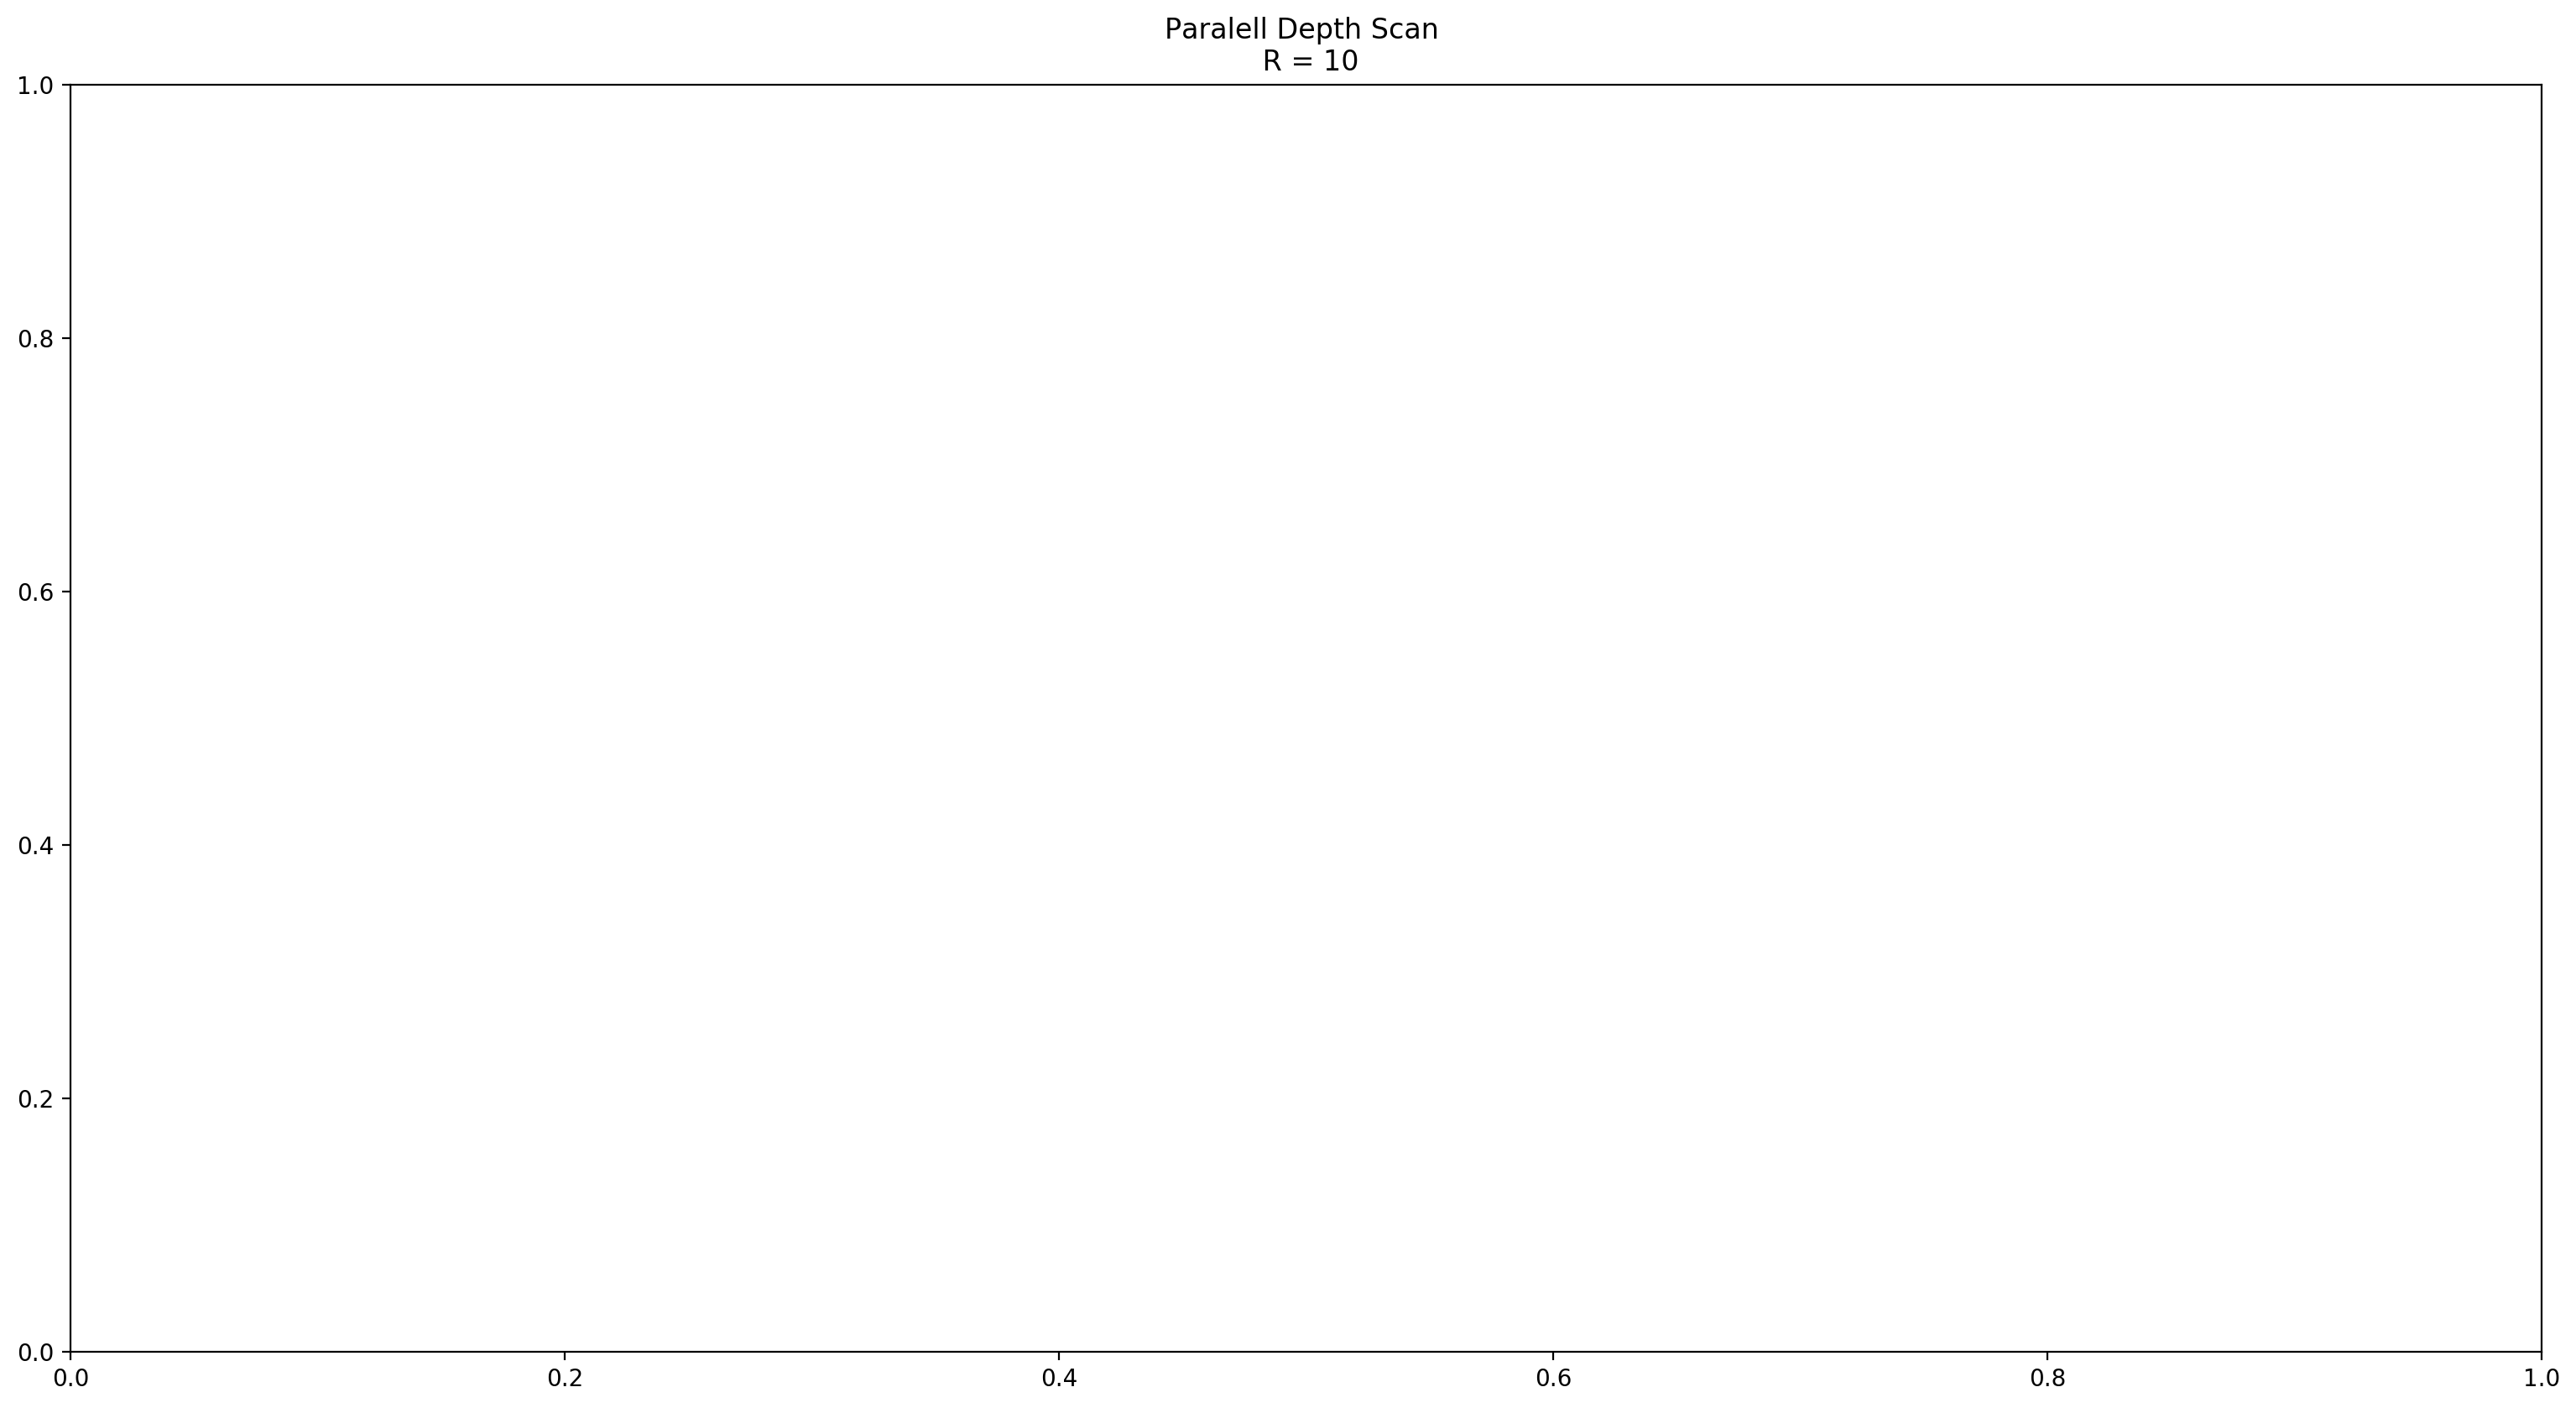

In [202]:
# Paralell Scan

for j in range(nRanges):
    #depth_scan = np.zeros((nDepths_rx, tx_pulse.nSamples))

    for i in range(nDepths_rx):
        spectrum_rx = ascan_rx[:,i,j,i]
        nHalf = int(len(spectrum_rx)/2)
        spectrum_rx[:nHalf] = np.zeros(nHalf)
        pulse_rx = np.fft.ifft(spectrum_rx)
        pulse_rx = butterBandpassFilter(pulse_rx, 0.25e9,0.75e9, 1/sampling_interval,4)
        #depth_scan[i,:] = abs(pulse_rx)**2
        bscan = abs(pulse_rx)**2
       
    time = np.linspace(min(tx_pulse.time_space), max(tx_pulse.time_space), len(abs(pulse_rx))) 
    #depth_scan[i,:] = pulse_rx.real
    fig=pl.figure(figsize=(19,10), dpi =200)
    ax = fig.add_subplot(111)
    ax.set_title('Paralell Depth Scan \n R = ' + str(int(Range_list[j])))
    #ax.imshow(10*np.log10(depth_scan), extent=(0,max(tx_pulse.time_space)*1e9, max(sourceDepth_list), 0), aspect='auto')
    pmesh = ax.imshow(bscan, extent=(min(time), max(time)*1e9, max(sourceDepth_list), 0), aspect='auto')
    cbar = pl.colorbar(pmesh)


    ax.set_ylabel('Depth TX and RX (in paralell) [m]')
    ax.set_xlabel('Time [ns]')
    
    
    if i == nRanges -1:
        ax.set_xlabel('Time [ns]')
    if i == 0:
        ax.set_ylabel('Depth [m]')
    pl.show()

In [167]:
#Wavefront emanating from source depth:
sourceDepth = 20
id_tx = util.findNearest(tx_array, sourceDepth)
print(id_tx, tx_array[id_tx])

10 20.0


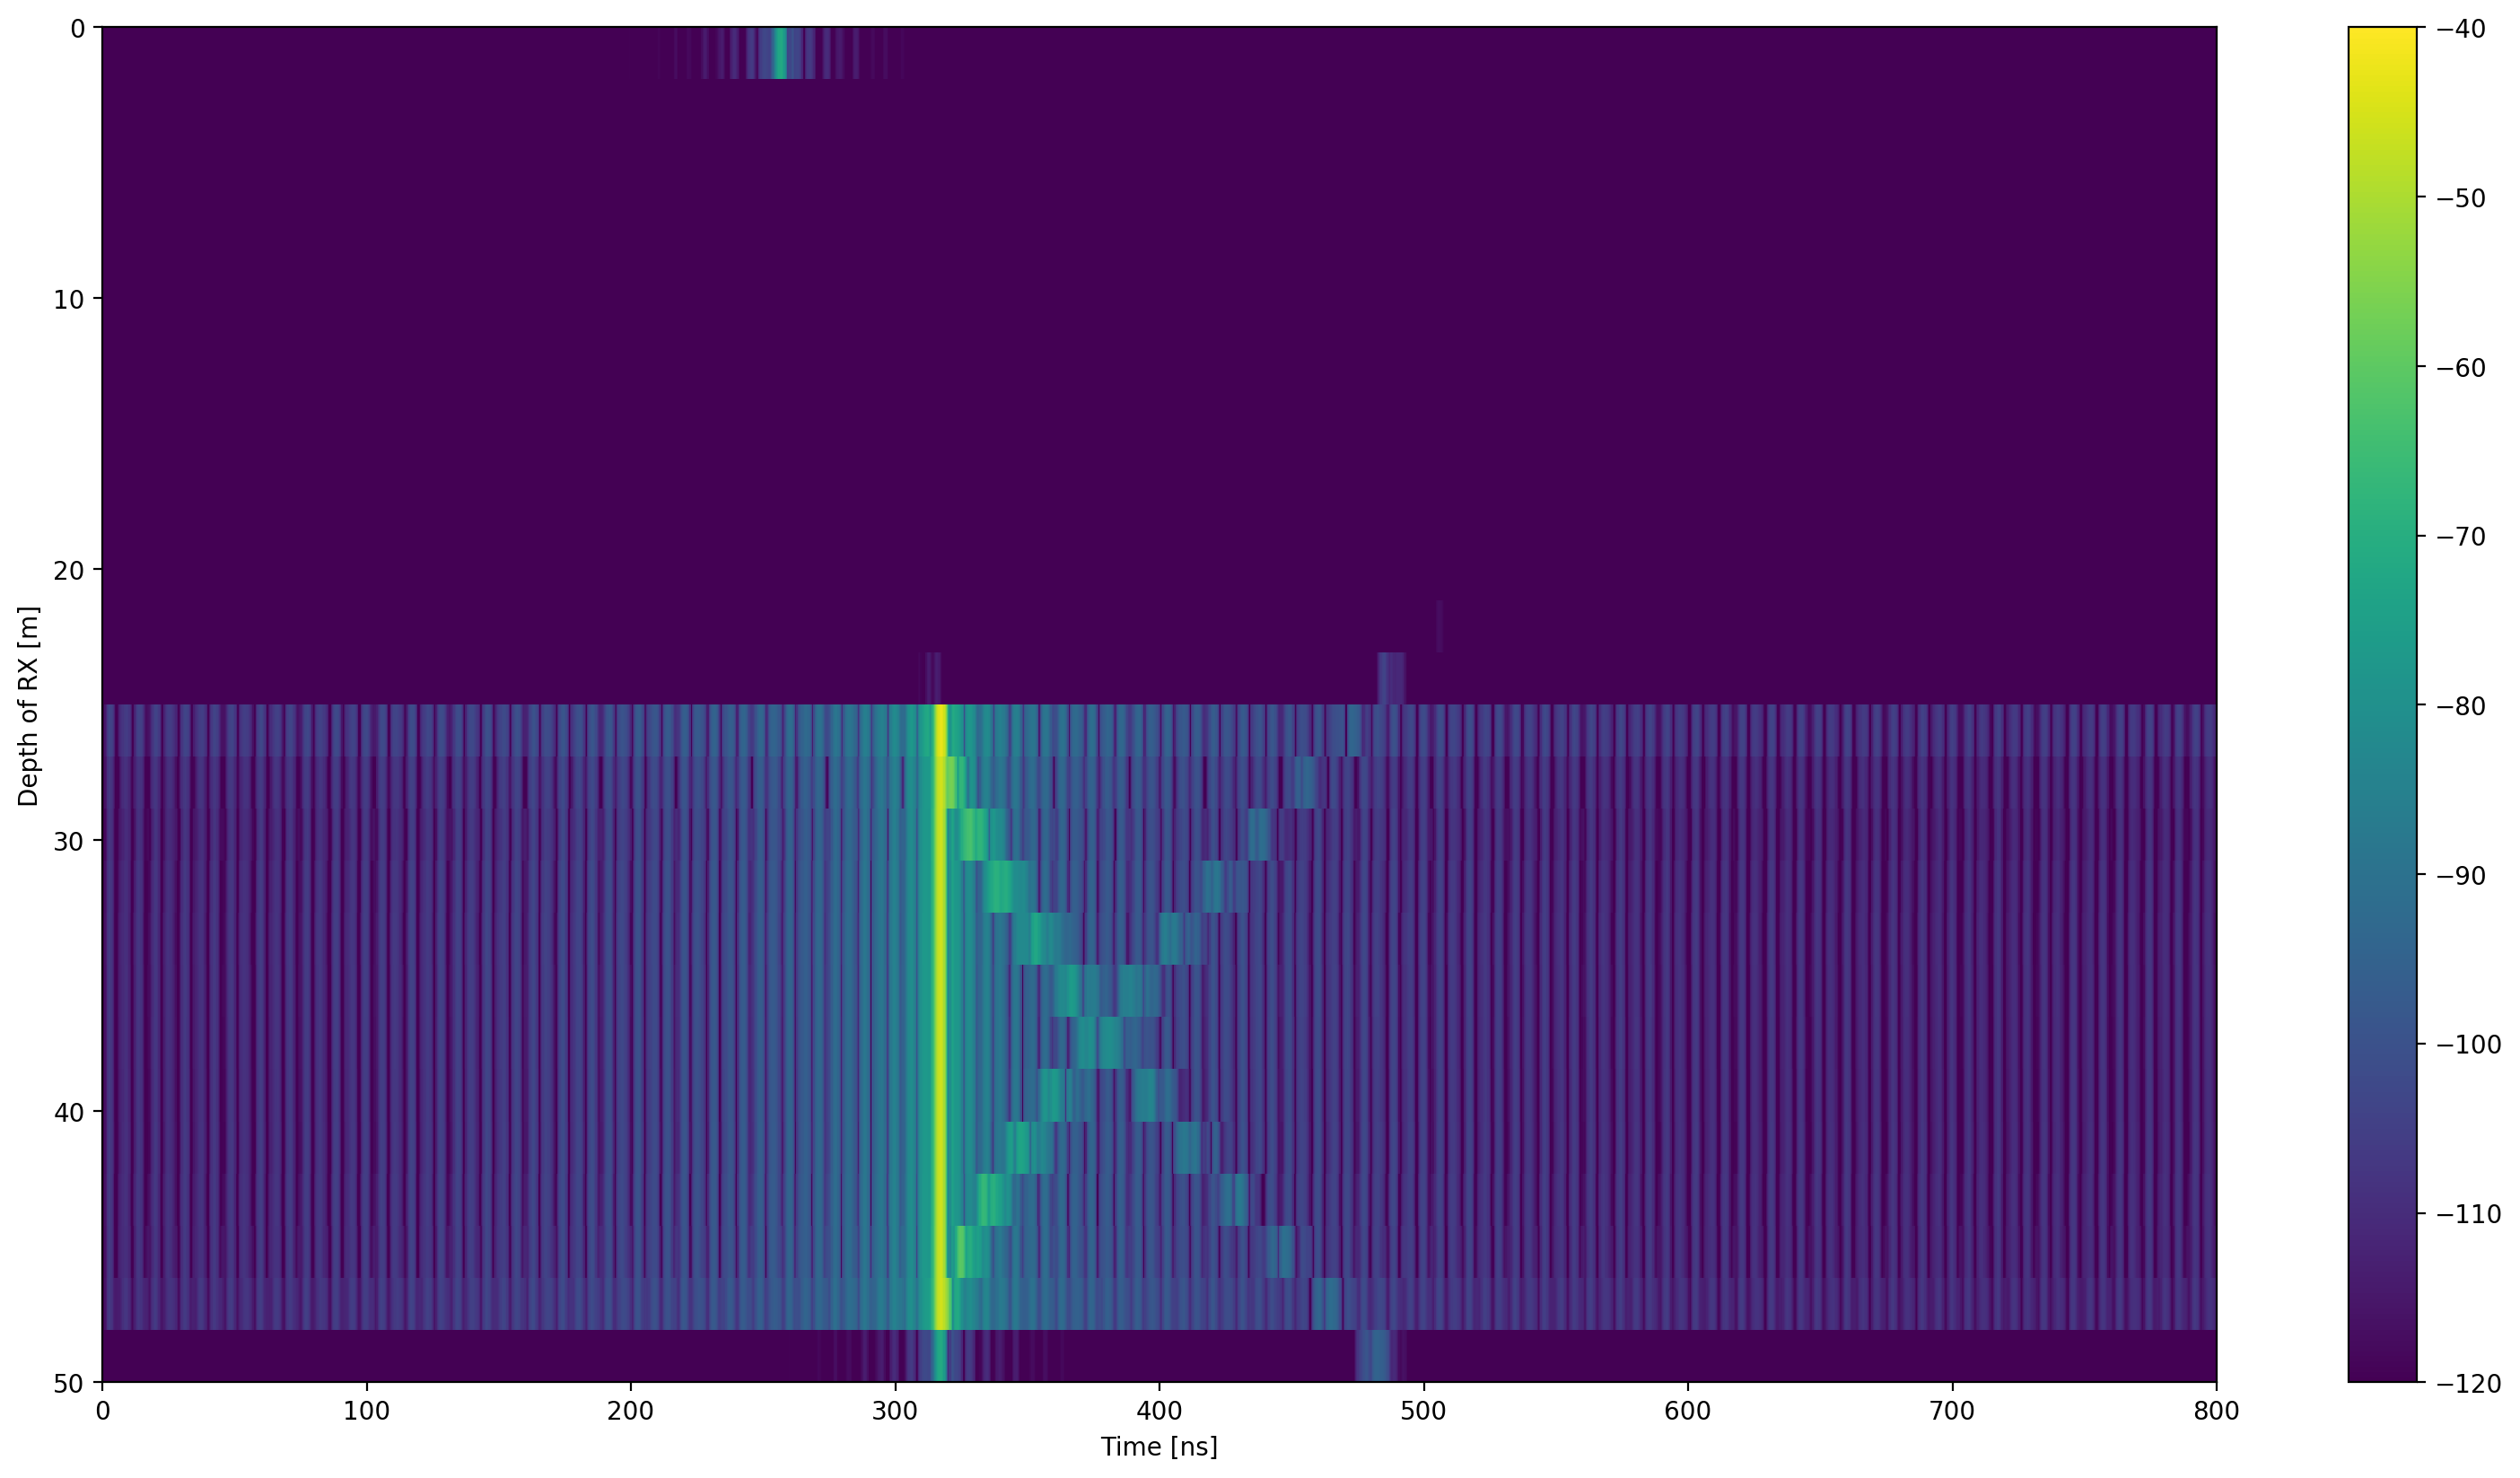

In [166]:
# fix depth of TX, varying range between TX and RX 

#for j in range(nRanges):
 #   depth_scan = np.zeros((nDepths_rx, tx_pulse.nSamples))
bscan_parallel = np.zeros((nDepths_rx, nSamples), dtype='float')
bscan_parallel_ref = np.zeros((nDepths_rx, nSamples), dtype='float')

for i in range(nDepths_rx):
    spectrum_rx = ascan_rx[:,i,1,i]
    nHalf = int(len(spectrum_rx)/2)
    spectrum_rx[:nHalf] = np.zeros(nHalf)
    pulse_rx = np.fft.ifft(spectrum_rx)
    pulse_rx = butterBandpassFilter(pulse_rx, 0.25e9,0.75e9, 1/sampling_interval,4)
    
    spectrum_rx_ref = ascan_rx_ref[:,i,1,i]
    nHalf_ref = int(len(spectrum_rx_ref)/2)
    pulse_rx_ref[:nHalf_ref] = np.zeros(nHalf_ref)
    pulse_rx_ref = np.fft.ifft(spectrum_rx_ref)
    pulse_rx_ref = butterBandpassFilter(pulse_rx_ref, 0.25e9, 0.75e9, 1/sampling_interval,4)

    #depth_scan[i,:] = abs(pulse_rx)**2
    bscan_parallel[i,:] = abs(pulse_rx)**2
    bscan_parallel_ref[i,:] = 20*np.log10(abs(pulse_rx_ref))#abs(pulse_rx_ref)**2
    
fig=pl.figure(figsize=(19,10), dpi = 200)
ax = fig.add_subplot(111)
#ax.set_title('Fixed Depth Scan \n Depth of TX: ' + str(tx_array[id_tx]) + ' Range between TX and RX, R = ' + str(int(Range_list[j])))
#ax.imshow(10*np.log10(depth_scan), extent=(0,max(tx_pulse.time_space)*1e9, max(sourceDepth_list), 0), aspect='auto')
pmesh = ax.imshow(10*np.log10(bscan_parallel), extent=(0,max(tx_pulse.time_space)*1e9, max(sourceDepth_list), 0), aspect='auto', vmin=-120, vmax=-40)
cbar = pl.colorbar(pmesh)

ax.set_ylabel('Depth of RX [m]')
ax.set_xlabel('Time [ns]')


if i == nRanges -1:
    ax.set_xlabel('Time [ns]')
if i == 0:
    ax.set_ylabel('Depth [m]')
pl.show()

In [38]:
# Determining the Depth of the Water Pocket in 1D - refractive index profile

delay_data = np.genfromtxt('delay_times_pure_ice.txt', skip_header=1).T
epsilon_r = 3.2    # relative permittivity of pure ice
t_delay = delay_data[1] 
c = 2.997e8         
r = delay_data[0]    # Range between Antennas
# -------------- #
d = 0.5 * np.sqrt((c**2/epsilon_r)*t_delay**2-r**2)   #depth

In [ ]:
fig = pl.figure(figsize=(19,10), dpi = 200)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.plot(r, t_delay, linestyle='--')
ax2.plot(r, d, linestyle=':', c='r')
ax1.set_xlabel('Range [m]')
ax2.set_xlabel('Range [m]')
ax1.set_ylabel('Delay Time [s]')
ax2.set_ylabel('Estimated Depth [m]')

depth = np.mean(d)
ax2.axhline(depth)
ax2.text(5,38, r'Average Depth: '+str(round(depth,3))+'[m]', fontsize=13, style='italic')
